## Real Data Time Series (EEG dataset)



This Notebook generates data for the eeg dataset 

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from utils import extract_time
from utils import random_generator
from utils import MinMaxScaler
from utils import sine_data_generation
from utils import visualization

from modules_and_training import TimeGAN
from modules_and_training import Time_GAN_module

# Helper Functions

In [ ]:
def real_data_loading (data_name, seq_len):
  """Load and preprocess real-world datasets.
  
  Args:
    - data_name: stock or energy
    - seq_len: sequence length
    
  Returns:
    - data: preprocessed data.
  """  
  assert data_name in ['stock','energy', 'eeg']
  
  if data_name == "eeg":
    ori_data = pd.read_csv("data/eeg.csv") #file too large for github. see preprocess_eeg_data.R
  else:
    if data_name == 'stock':
      ori_data = np.loadtxt('data/stock_data.csv', delimiter = ",",skiprows = 1)
    elif data_name == 'energy':
      ori_data = np.loadtxt('data/energy_data.csv', delimiter = ",",skiprows = 1)
        
  # Flip the data to make chronological data
  ori_data = ori_data[::-1]
  # Normalize the data
  if data_name != "eeg":
    ori_data = MinMaxScaler(ori_data)
    
  # Preprocess the dataset
  temp_data = []    
  # Cut data by sequence length
  if data_name != "eeg":
    MAX_ROWS = len(ori_data) - seq_len
  else:
    MAX_ROWS = seq_len*5000

  for i in range(0, min(len(ori_data) - seq_len, MAX_ROWS)):
    _x = ori_data[i:i + seq_len]
    temp_data.append(_x)
        
  # Mix the datasets (to make it similar to i.i.d)
  idx = np.random.permutation(len(temp_data))    
  data = []
  for i in range(len(temp_data)):
    if (data_name != "eeg"):
       data.append(temp_data[idx[i]])
    else:
       if (temp_data[idx[i]]).isna().sum().sum() == 0: #no NAs
          data.append(temp_data[idx[i]].to_numpy())   
    
  return data



Parameters

In [ ]:
parameters = dict()
parameters['module'] = 'gru' 
parameters['hidden_dim'] = 40
parameters['num_layers'] = 1
parameters['iterations'] = 100
parameters['epoch'] = 4 

data_name = "eeg"

if data_name == "eeg":
  seq_len, dim = 24, 7
  data = real_data_loading(data_name, seq_len)
  data = torch.Tensor(data) 

if data_name == "sine":
  no = 306000
  seq_len, dim = 24, 1
  data = sine_data_generation(no, seq_len, dim)

In [ ]:
data = data[0:102000]#restrict number of samples for illustration purposes
#should not be too small though, as timegan needs relatively large numbers of training data, see below

no = len(data)#number of examples 
parameters['batch_size'] = 1020

Start Embedding Network Training
step: 1/4, e_loss: 16.574167
step: 2/4, e_loss: 16.572084
step: 3/4, e_loss: 16.57146
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 1/4, s_loss: 0.071998194
step: 2/4, s_loss: 0.046150774
step: 3/4, s_loss: 0.03191264
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/4, D_loss: 3.2718682, G_loss_U: 0.31604955, G_loss_S: 0.0005517521, E_loss_t0: 16.663286


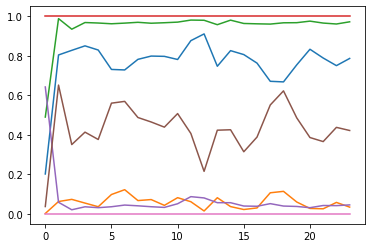

step: 0/4, D_loss: 2.8609562, G_loss_U: 0.43260035, G_loss_S: 0.0015689105, E_loss_t0: 16.32985


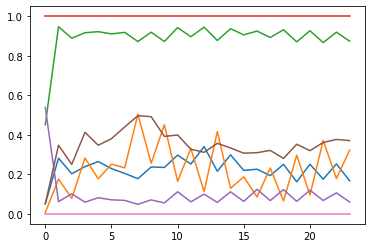

step: 0/4, D_loss: 2.4036326, G_loss_U: 0.58128065, G_loss_S: 0.005303338, E_loss_t0: 16.401735


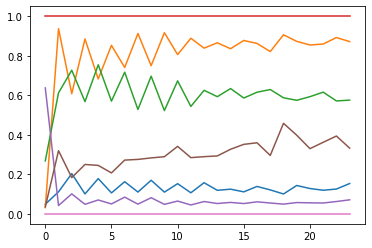

step: 0/4, D_loss: 2.0997674, G_loss_U: 0.7448639, G_loss_S: 0.012300177, E_loss_t0: 16.709274


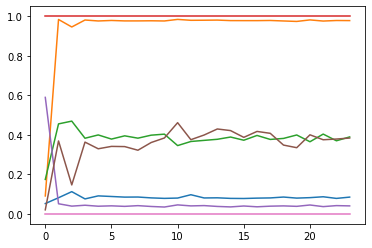

step: 0/4, D_loss: 1.9373565, G_loss_U: 0.90792626, G_loss_S: 0.02067057, E_loss_t0: 16.471134


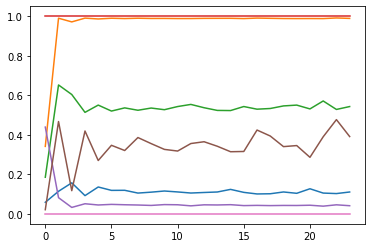

step: 0/4, D_loss: 1.8666606, G_loss_U: 1.0544006, G_loss_S: 0.028799789, E_loss_t0: 16.581959


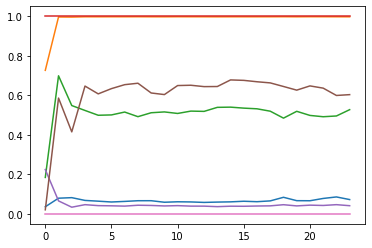

step: 0/4, D_loss: 1.8483744, G_loss_U: 1.1665696, G_loss_S: 0.036296975, E_loss_t0: 16.476372


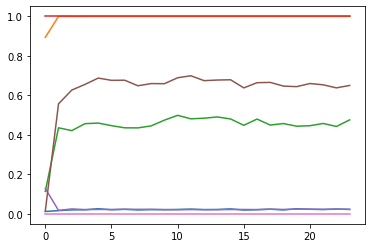

step: 0/4, D_loss: 1.8494847, G_loss_U: 1.2313281, G_loss_S: 0.043346807, E_loss_t0: 16.414097


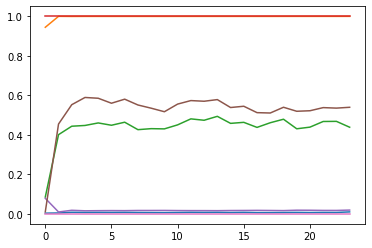

step: 0/4, D_loss: 1.8478112, G_loss_U: 1.2456524, G_loss_S: 0.048731413, E_loss_t0: 16.379128


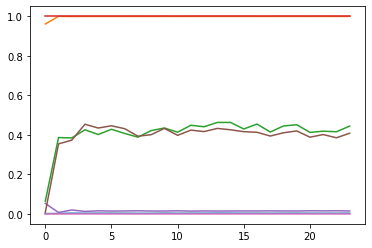

step: 0/4, D_loss: 1.8323382, G_loss_U: 1.2154872, G_loss_S: 0.0533181, E_loss_t0: 16.511538


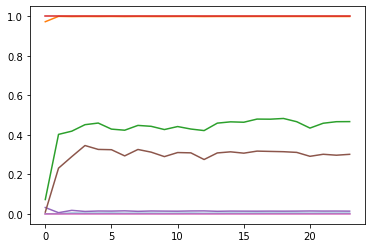

step: 0/4, D_loss: 1.8000858, G_loss_U: 1.1525161, G_loss_S: 0.057622287, E_loss_t0: 16.601639


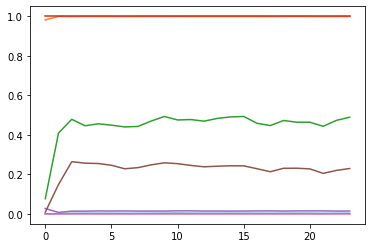

step: 0/4, D_loss: 1.759162, G_loss_U: 1.070883, G_loss_S: 0.060762886, E_loss_t0: 16.678005


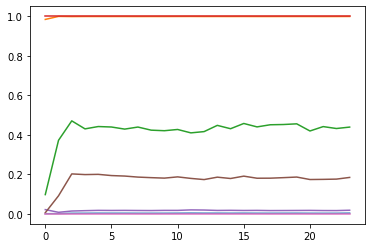

step: 0/4, D_loss: 1.7151567, G_loss_U: 0.9848239, G_loss_S: 0.063635334, E_loss_t0: 16.599382


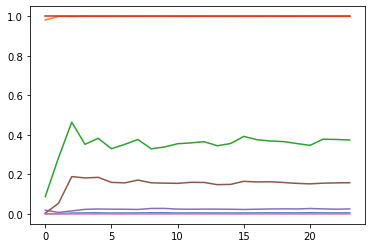

step: 0/4, D_loss: 1.6728302, G_loss_U: 0.9056351, G_loss_S: 0.066057466, E_loss_t0: 16.546713


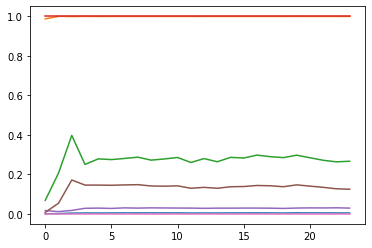

step: 0/4, D_loss: 1.628786, G_loss_U: 0.8397519, G_loss_S: 0.06834211, E_loss_t0: 16.614832


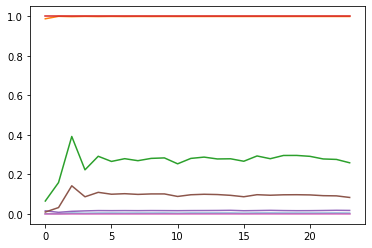

step: 0/4, D_loss: 1.5758986, G_loss_U: 0.7898459, G_loss_S: 0.07091056, E_loss_t0: 16.296555


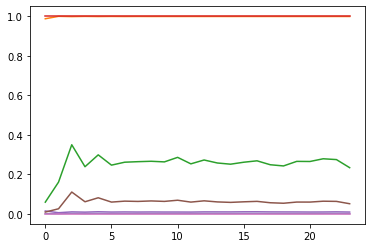

step: 0/4, D_loss: 1.5135138, G_loss_U: 0.75849473, G_loss_S: 0.0729805, E_loss_t0: 16.462503


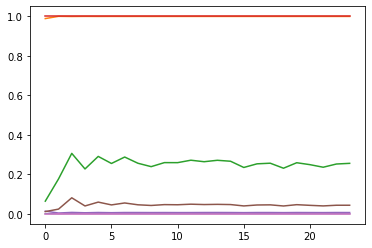

step: 0/4, D_loss: 1.4465585, G_loss_U: 0.7556273, G_loss_S: 0.07474006, E_loss_t0: 16.538578


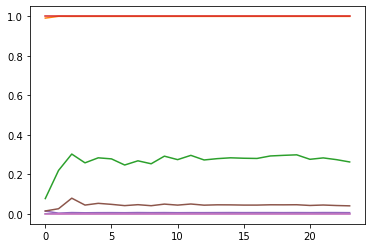

step: 0/4, D_loss: 1.3727381, G_loss_U: 0.818341, G_loss_S: 0.07670383, E_loss_t0: 16.404303


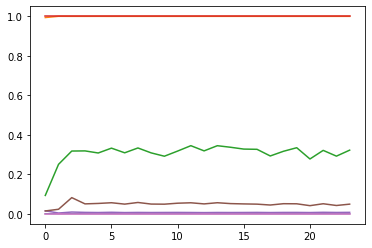

step: 0/4, D_loss: 1.2696661, G_loss_U: 1.106651, G_loss_S: 0.077895835, E_loss_t0: 16.463106


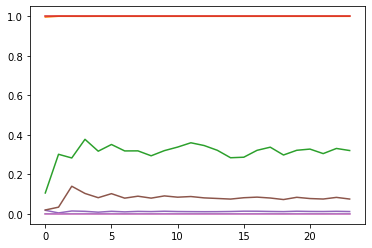

step: 0/4, D_loss: 1.0801226, G_loss_U: 1.6331576, G_loss_S: 0.07946495, E_loss_t0: 16.485636


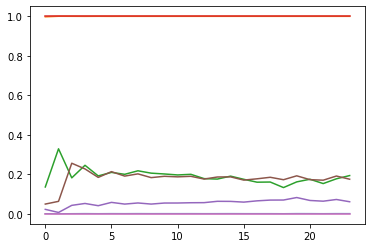

step: 0/4, D_loss: 0.93461, G_loss_U: 1.8767431, G_loss_S: 0.081463546, E_loss_t0: 16.291199


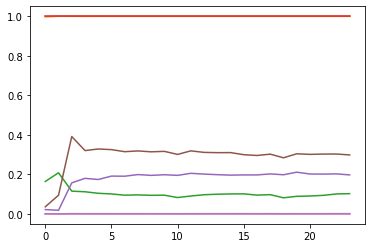

step: 0/4, D_loss: 0.71572894, G_loss_U: 2.0291708, G_loss_S: 0.08257664, E_loss_t0: 16.482576


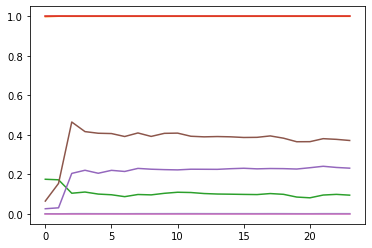

step: 0/4, D_loss: 0.5037194, G_loss_U: 2.1939938, G_loss_S: 0.0853767, E_loss_t0: 16.366875


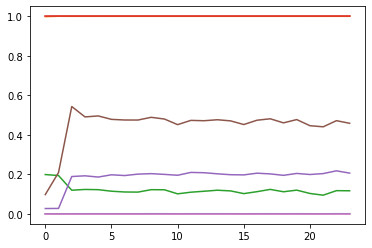

step: 0/4, D_loss: 0.3805244, G_loss_U: 2.4060953, G_loss_S: 0.086912245, E_loss_t0: 16.634405


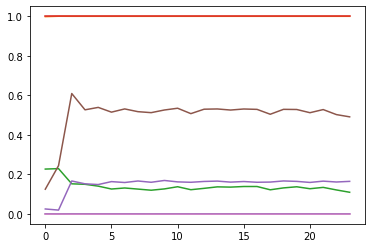

step: 0/4, D_loss: 0.3001858, G_loss_U: 2.6755812, G_loss_S: 0.08933709, E_loss_t0: 16.680874


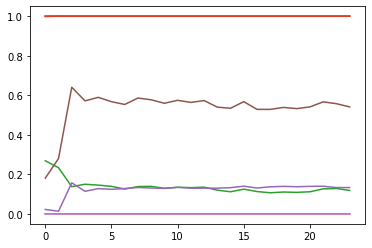

step: 0/4, D_loss: 0.23652877, G_loss_U: 2.9674249, G_loss_S: 0.09126915, E_loss_t0: 16.606882


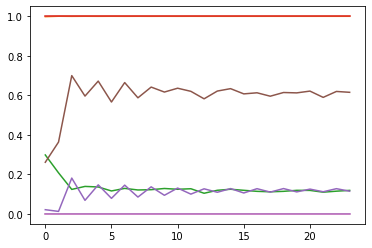

step: 0/4, D_loss: 0.18360704, G_loss_U: 3.2531445, G_loss_S: 0.093503475, E_loss_t0: 16.406275


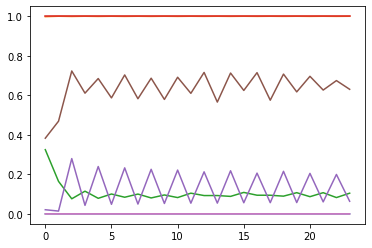

step: 0/4, D_loss: 0.14633702, G_loss_U: 3.2496665, G_loss_S: 0.09444259, E_loss_t0: 16.690931


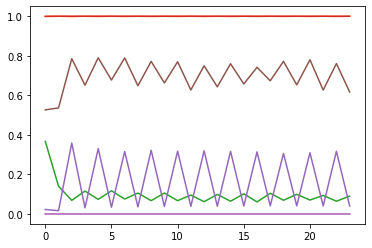

step: 0/4, D_loss: 0.1460551, G_loss_U: 3.2461298, G_loss_S: 0.09596991, E_loss_t0: 16.402912


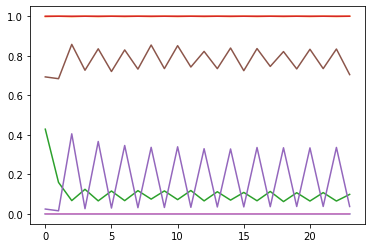

step: 0/4, D_loss: 0.14623176, G_loss_U: 3.242692, G_loss_S: 0.09648273, E_loss_t0: 16.439173


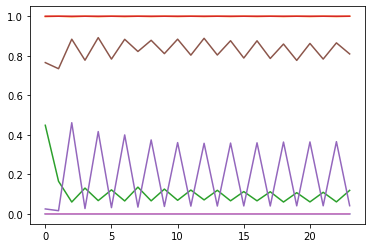

step: 0/4, D_loss: 0.14552279, G_loss_U: 3.2394931, G_loss_S: 0.09704177, E_loss_t0: 16.690784


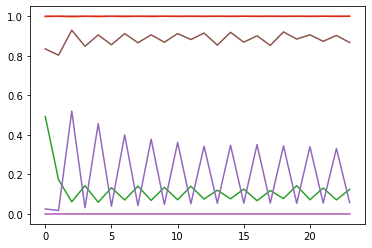

step: 0/4, D_loss: 0.14731817, G_loss_U: 3.236661, G_loss_S: 0.09725319, E_loss_t0: 16.416237


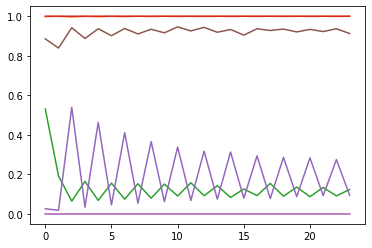

step: 0/4, D_loss: 0.14723708, G_loss_U: 3.2342947, G_loss_S: 0.09701067, E_loss_t0: 16.306776


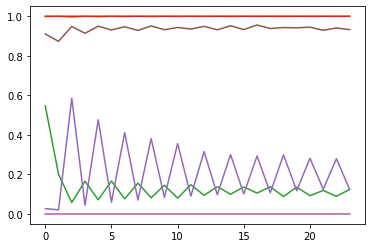

step: 0/4, D_loss: 0.14679278, G_loss_U: 3.2323947, G_loss_S: 0.09708225, E_loss_t0: 16.468678


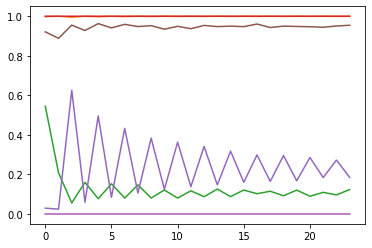

step: 0/4, D_loss: 0.14780286, G_loss_U: 3.2309155, G_loss_S: 0.09632258, E_loss_t0: 16.561792


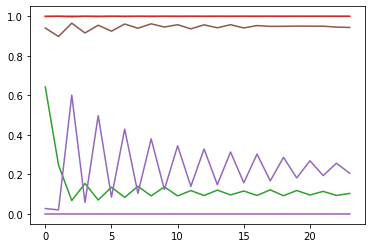

step: 0/4, D_loss: 0.15265408, G_loss_U: 3.5072036, G_loss_S: 0.09635841, E_loss_t0: 16.459433


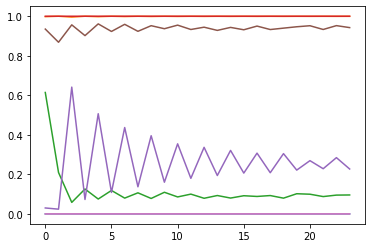

step: 0/4, D_loss: 0.12731273, G_loss_U: 3.5064993, G_loss_S: 0.0952168, E_loss_t0: 16.637825


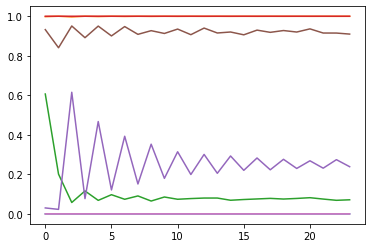

step: 0/4, D_loss: 0.13326041, G_loss_U: 3.505971, G_loss_S: 0.09502284, E_loss_t0: 16.632524


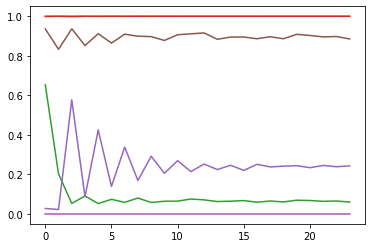

step: 0/4, D_loss: 0.12898448, G_loss_U: 3.505568, G_loss_S: 0.09408453, E_loss_t0: 16.430546


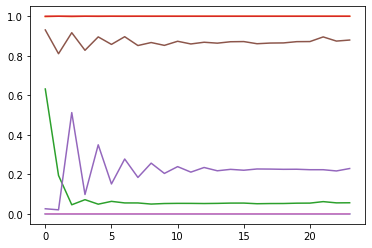

step: 0/4, D_loss: 0.14393747, G_loss_U: 3.5052526, G_loss_S: 0.09270059, E_loss_t0: 16.654825


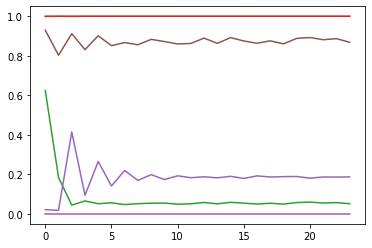

step: 0/4, D_loss: 0.1263633, G_loss_U: 3.504999, G_loss_S: 0.092258014, E_loss_t0: 16.460613


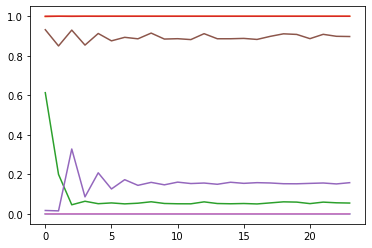

step: 0/4, D_loss: 0.14405265, G_loss_U: 3.5047865, G_loss_S: 0.09126812, E_loss_t0: 16.644182


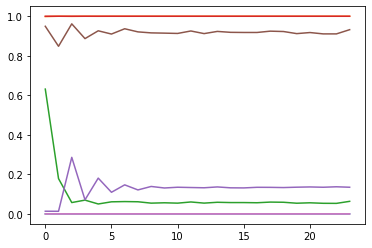

step: 0/4, D_loss: 0.14858022, G_loss_U: 3.5046022, G_loss_S: 0.089864954, E_loss_t0: 16.41541


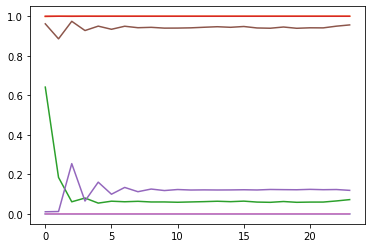

step: 0/4, D_loss: 0.15327589, G_loss_U: 3.747866, G_loss_S: 0.08910482, E_loss_t0: 16.447872


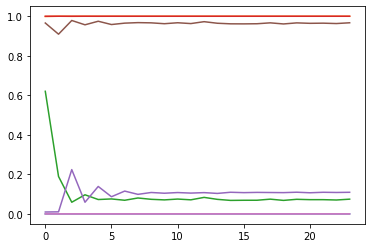

step: 0/4, D_loss: 0.15096521, G_loss_U: 3.9578338, G_loss_S: 0.08830381, E_loss_t0: 16.603338


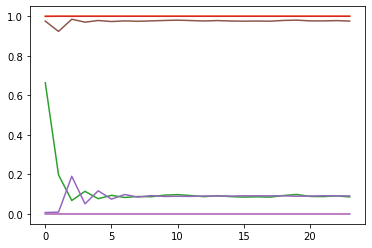

step: 0/4, D_loss: 0.13430803, G_loss_U: 3.9577136, G_loss_S: 0.087680615, E_loss_t0: 16.307564


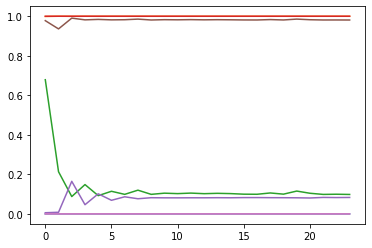

step: 0/4, D_loss: 0.12553717, G_loss_U: 3.9575942, G_loss_S: 0.08771959, E_loss_t0: 16.472061


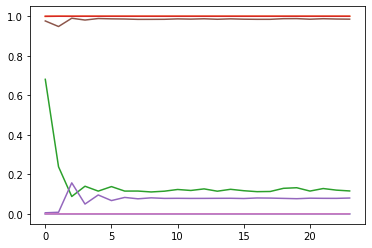

step: 0/4, D_loss: 0.12690991, G_loss_U: 3.9574735, G_loss_S: 0.08722856, E_loss_t0: 16.512468


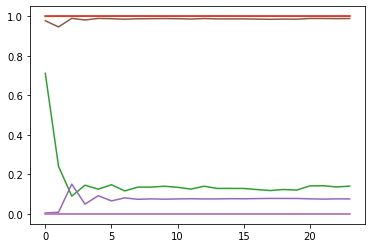

step: 0/4, D_loss: 0.13837908, G_loss_U: 3.9573472, G_loss_S: 0.08660629, E_loss_t0: 16.343641


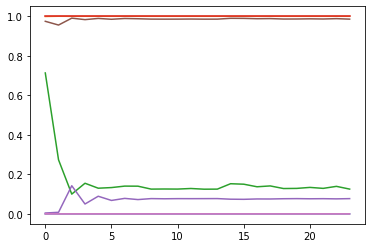

step: 0/4, D_loss: 0.12392663, G_loss_U: 3.9572139, G_loss_S: 0.08633883, E_loss_t0: 16.4002


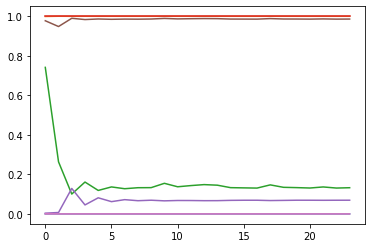

step: 0/4, D_loss: 0.13276196, G_loss_U: 3.95707, G_loss_S: 0.08561462, E_loss_t0: 16.532673


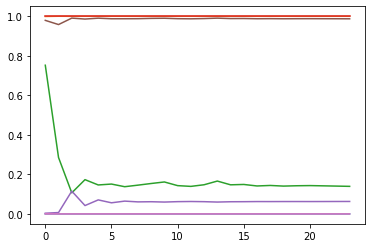

step: 0/4, D_loss: 0.13637292, G_loss_U: 3.9569128, G_loss_S: 0.08498841, E_loss_t0: 16.597399


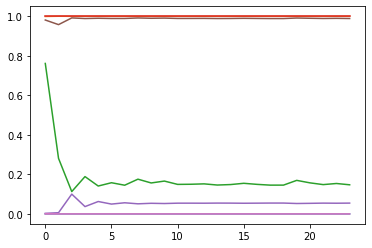

step: 0/4, D_loss: 0.14135402, G_loss_U: 3.9567387, G_loss_S: 0.08432443, E_loss_t0: 16.622711


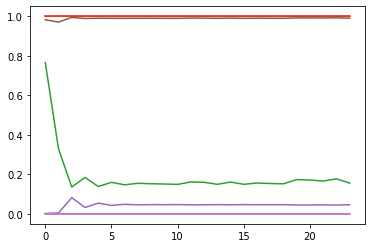

step: 0/4, D_loss: 0.14132676, G_loss_U: 3.9565437, G_loss_S: 0.084163785, E_loss_t0: 16.39209


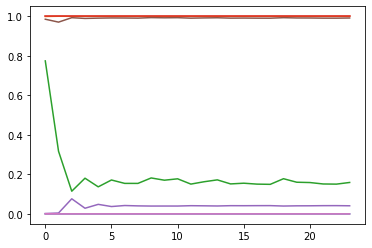

step: 0/4, D_loss: 0.1461966, G_loss_U: 3.9563208, G_loss_S: 0.08325285, E_loss_t0: 16.57927


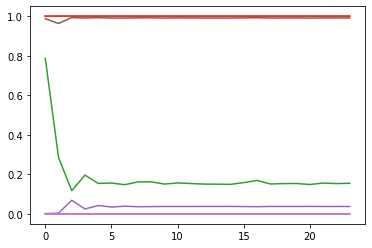

step: 0/4, D_loss: 0.16702741, G_loss_U: 4.133524, G_loss_S: 0.08240125, E_loss_t0: 16.5189


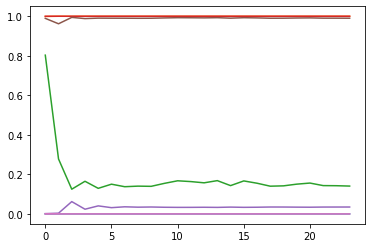

step: 0/4, D_loss: 0.12993467, G_loss_U: 4.1332226, G_loss_S: 0.08216091, E_loss_t0: 16.535473


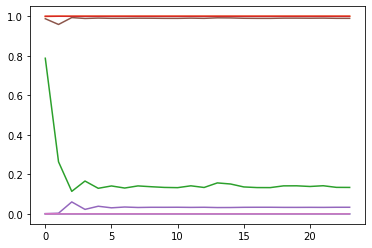

step: 0/4, D_loss: 0.1294479, G_loss_U: 4.132867, G_loss_S: 0.08172254, E_loss_t0: 16.508942


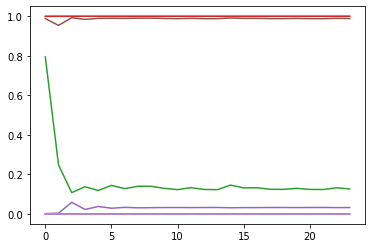

step: 0/4, D_loss: 0.15365498, G_loss_U: 4.2838726, G_loss_S: 0.08110718, E_loss_t0: 16.417156


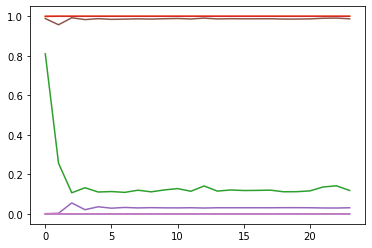

step: 0/4, D_loss: 0.11317261, G_loss_U: 4.283348, G_loss_S: 0.08062378, E_loss_t0: 16.430422


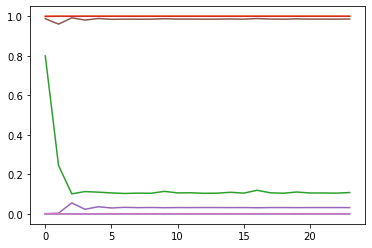

step: 0/4, D_loss: 0.13097799, G_loss_U: 4.2827153, G_loss_S: 0.080083944, E_loss_t0: 16.368439


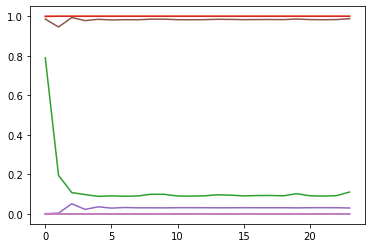

step: 0/4, D_loss: 0.11830319, G_loss_U: 4.2819586, G_loss_S: 0.08038063, E_loss_t0: 16.418922


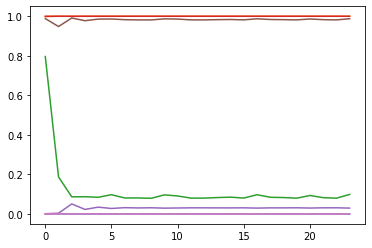

step: 0/4, D_loss: 0.117848955, G_loss_U: 4.281063, G_loss_S: 0.079890855, E_loss_t0: 16.362562


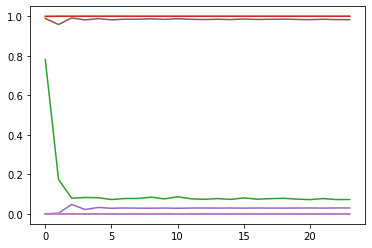

step: 0/4, D_loss: 0.11095119, G_loss_U: 4.2800355, G_loss_S: 0.07914062, E_loss_t0: 16.497984


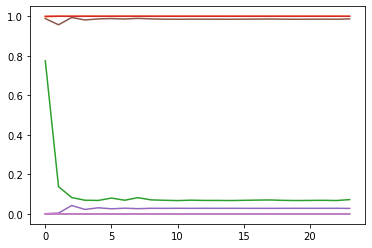

step: 0/4, D_loss: 0.12162652, G_loss_U: 4.278899, G_loss_S: 0.07852786, E_loss_t0: 16.564512


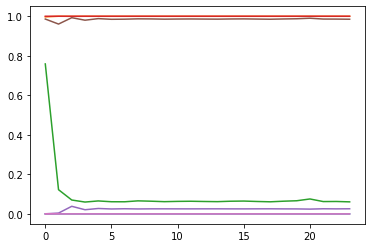

step: 0/4, D_loss: 0.119858354, G_loss_U: 4.2777014, G_loss_S: 0.07810928, E_loss_t0: 16.348417


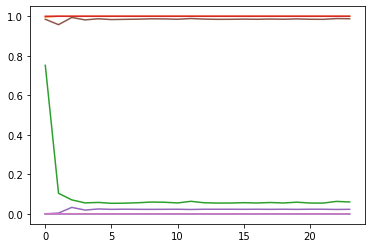

step: 0/4, D_loss: 0.10442812, G_loss_U: 4.2764955, G_loss_S: 0.07714827, E_loss_t0: 16.557926


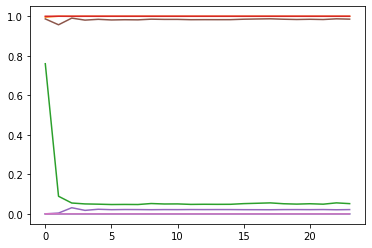

step: 0/4, D_loss: 0.13039686, G_loss_U: 4.275342, G_loss_S: 0.076328255, E_loss_t0: 16.439518


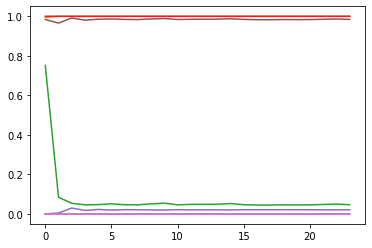

step: 0/4, D_loss: 0.11758051, G_loss_U: 4.2742643, G_loss_S: 0.075456254, E_loss_t0: 16.470526


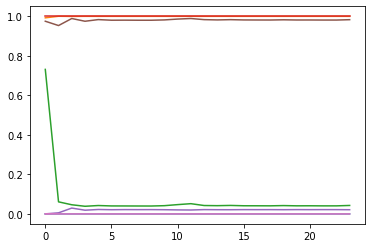

step: 0/4, D_loss: 0.10885083, G_loss_U: 4.2732587, G_loss_S: 0.074435845, E_loss_t0: 16.724133


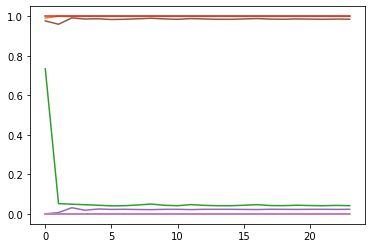

step: 0/4, D_loss: 0.118645325, G_loss_U: 4.2722964, G_loss_S: 0.07441468, E_loss_t0: 16.303753


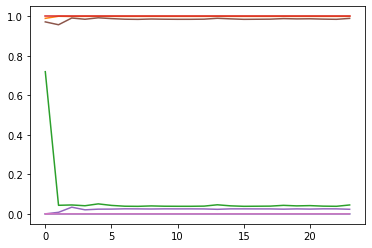

step: 0/4, D_loss: 0.128598, G_loss_U: 4.271337, G_loss_S: 0.073105894, E_loss_t0: 16.42378


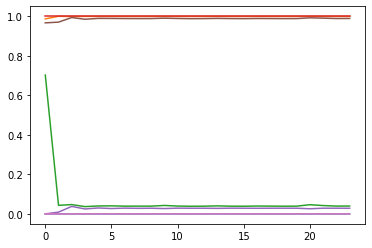

step: 0/4, D_loss: 0.12654933, G_loss_U: 4.270345, G_loss_S: 0.072383985, E_loss_t0: 16.39547


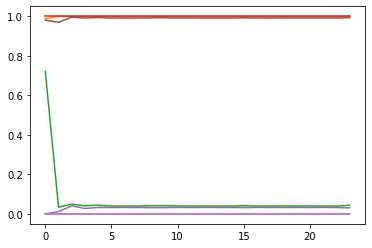

step: 0/4, D_loss: 0.15329795, G_loss_U: 4.3626404, G_loss_S: 0.071564145, E_loss_t0: 16.486185


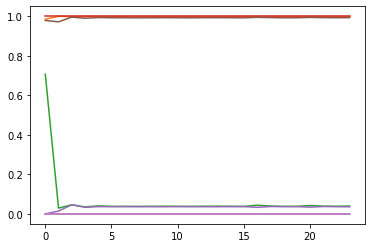

step: 0/4, D_loss: 0.08781452, G_loss_U: 4.3612933, G_loss_S: 0.07128619, E_loss_t0: 16.414934


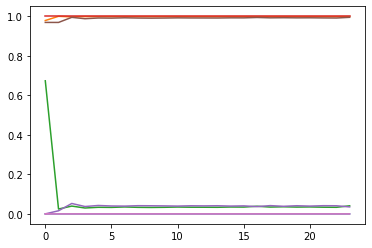

step: 0/4, D_loss: 0.08738, G_loss_U: 4.3597536, G_loss_S: 0.070848234, E_loss_t0: 16.585527


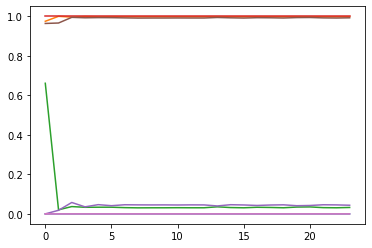

step: 0/4, D_loss: 0.095589764, G_loss_U: 4.357986, G_loss_S: 0.070538, E_loss_t0: 16.58075


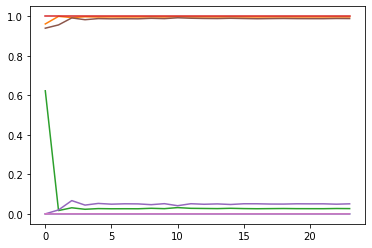

step: 0/4, D_loss: 0.09028483, G_loss_U: 4.355991, G_loss_S: 0.070389725, E_loss_t0: 16.376812


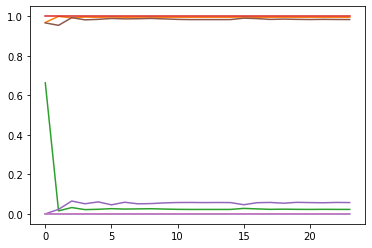

step: 0/4, D_loss: 0.09760994, G_loss_U: 4.3538256, G_loss_S: 0.06936553, E_loss_t0: 16.488358


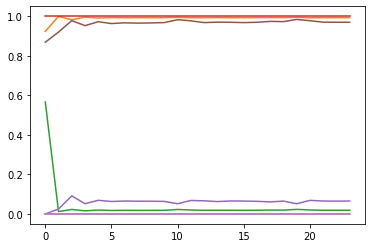

step: 0/4, D_loss: 0.08808243, G_loss_U: 4.3516107, G_loss_S: 0.06887327, E_loss_t0: 16.416145


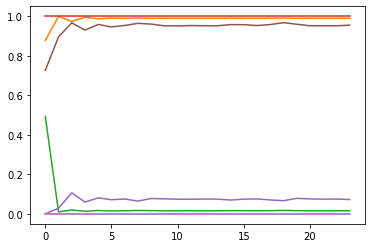

step: 0/4, D_loss: 0.0813949, G_loss_U: 4.349432, G_loss_S: 0.06868341, E_loss_t0: 16.368088


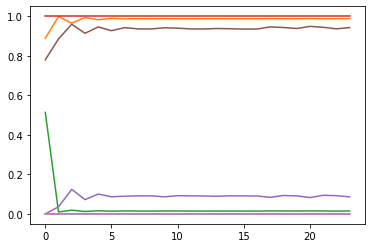

step: 0/4, D_loss: 0.10017887, G_loss_U: 4.3472633, G_loss_S: 0.06765796, E_loss_t0: 16.545841


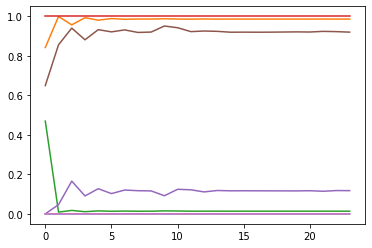

step: 0/4, D_loss: 0.10927374, G_loss_U: 4.3450117, G_loss_S: 0.067256264, E_loss_t0: 16.425282


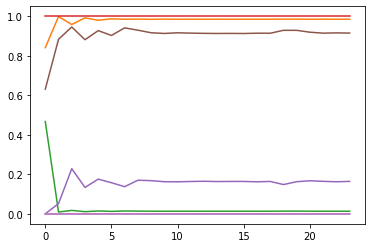

step: 0/4, D_loss: 0.09376552, G_loss_U: 4.342694, G_loss_S: 0.06625023, E_loss_t0: 16.42861


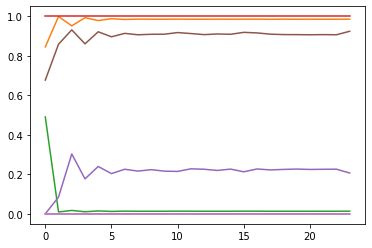

step: 0/4, D_loss: 0.093754485, G_loss_U: 4.3405166, G_loss_S: 0.06549877, E_loss_t0: 16.465578


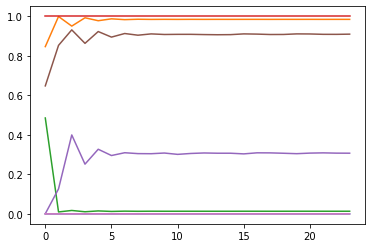

step: 0/4, D_loss: 0.11477409, G_loss_U: 4.338726, G_loss_S: 0.064876385, E_loss_t0: 16.246239


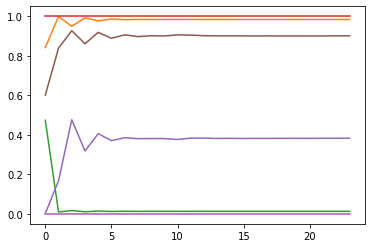

step: 0/4, D_loss: 0.1104529, G_loss_U: 4.3374014, G_loss_S: 0.064142324, E_loss_t0: 16.509655


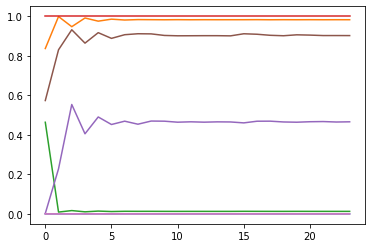

step: 0/4, D_loss: 0.08871318, G_loss_U: 4.3364506, G_loss_S: 0.06348298, E_loss_t0: 16.471178


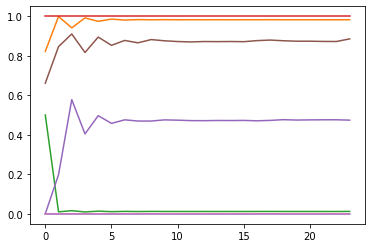

step: 0/4, D_loss: 0.10716498, G_loss_U: 4.335721, G_loss_S: 0.06279539, E_loss_t0: 16.507086


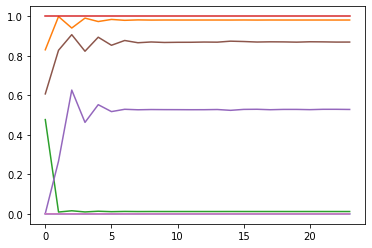

step: 0/4, D_loss: 0.11020206, G_loss_U: 4.335086, G_loss_S: 0.062226452, E_loss_t0: 16.474451


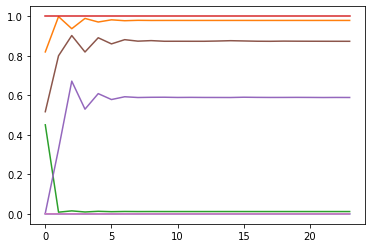

step: 0/4, D_loss: 0.1003924, G_loss_U: 4.33446, G_loss_S: 0.061388902, E_loss_t0: 16.353786


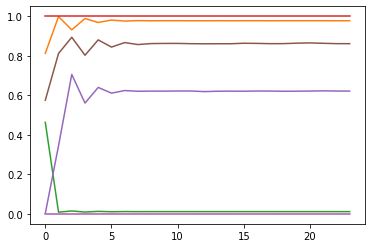

step: 0/4, D_loss: 0.10355458, G_loss_U: 4.333782, G_loss_S: 0.060742572, E_loss_t0: 16.69516


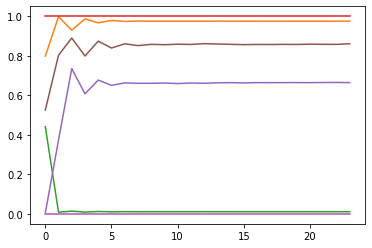

step: 0/4, D_loss: 0.116653904, G_loss_U: 4.3330073, G_loss_S: 0.06010901, E_loss_t0: 16.522697


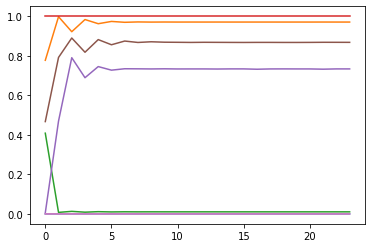

step: 0/4, D_loss: 0.11339426, G_loss_U: 4.3320937, G_loss_S: 0.059224218, E_loss_t0: 16.500101


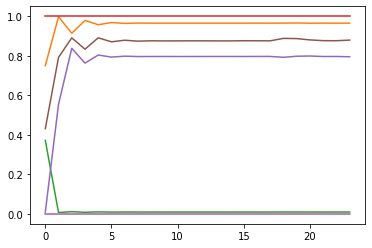

step: 0/4, D_loss: 0.12660487, G_loss_U: 4.331005, G_loss_S: 0.058635276, E_loss_t0: 16.489311


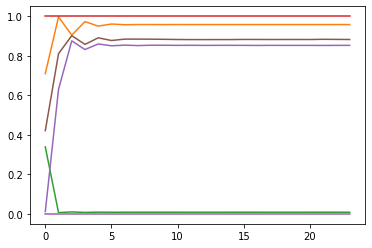

step: 0/4, D_loss: 0.116116315, G_loss_U: 4.3297195, G_loss_S: 0.05774806, E_loss_t0: 16.673347


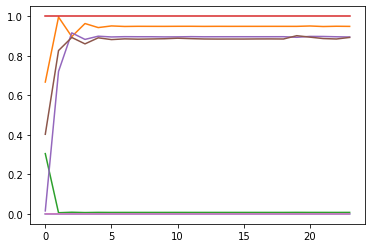

step: 0/4, D_loss: 0.16014965, G_loss_U: 4.3668046, G_loss_S: 0.056912806, E_loss_t0: 16.426445


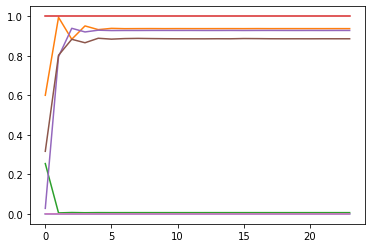

step: 0/4, D_loss: 0.08233626, G_loss_U: 4.3647137, G_loss_S: 0.056530356, E_loss_t0: 16.366068


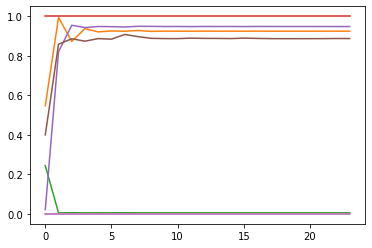

step: 0/4, D_loss: 0.09254903, G_loss_U: 4.3624835, G_loss_S: 0.056004133, E_loss_t0: 16.393663


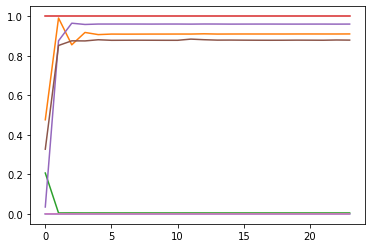

step: 1/4, D_loss: 4.2742834, G_loss_U: 0.03617298, G_loss_S: 0.05493254, E_loss_t0: 16.58371


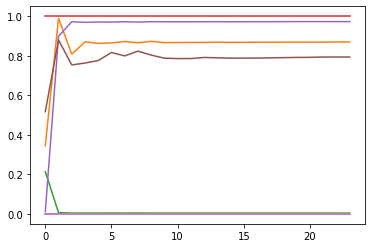

step: 1/4, D_loss: 4.212114, G_loss_U: 0.036271714, G_loss_S: 0.05434736, E_loss_t0: 16.250202


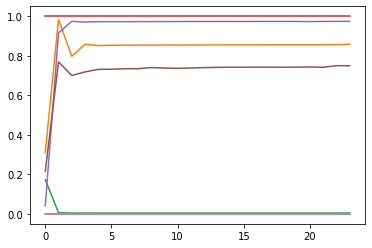

step: 1/4, D_loss: 4.0011845, G_loss_U: 0.041599024, G_loss_S: 0.05368646, E_loss_t0: 16.341772


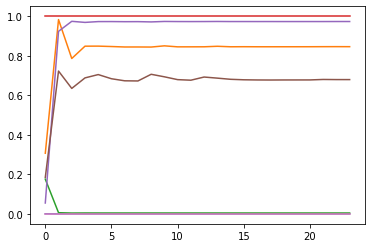

step: 1/4, D_loss: 3.6977785, G_loss_U: 0.053140633, G_loss_S: 0.05340338, E_loss_t0: 16.667616


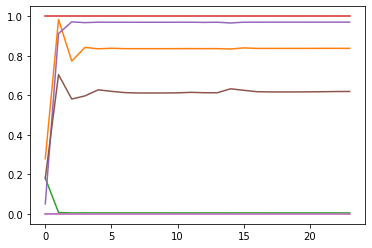

step: 1/4, D_loss: 3.3306482, G_loss_U: 0.07425707, G_loss_S: 0.052847125, E_loss_t0: 16.43747


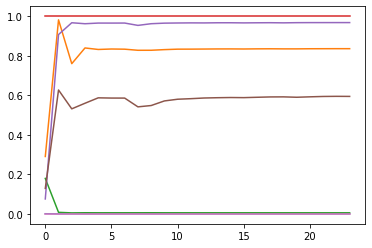

step: 1/4, D_loss: 2.918263, G_loss_U: 0.11177903, G_loss_S: 0.05247751, E_loss_t0: 16.556602


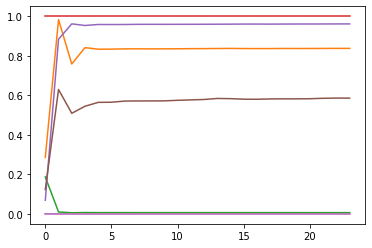

step: 1/4, D_loss: 2.4777925, G_loss_U: 0.1769904, G_loss_S: 0.051948804, E_loss_t0: 16.453613


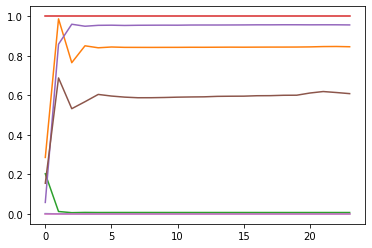

step: 1/4, D_loss: 2.0415773, G_loss_U: 0.28355148, G_loss_S: 0.052159525, E_loss_t0: 16.393864


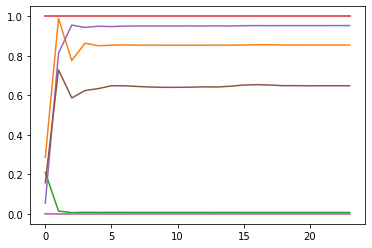

step: 1/4, D_loss: 1.6602547, G_loss_U: 0.45054007, G_loss_S: 0.051310264, E_loss_t0: 16.361618


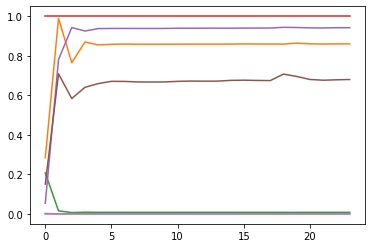

step: 1/4, D_loss: 1.3640059, G_loss_U: 0.7375137, G_loss_S: 0.051161192, E_loss_t0: 16.495108


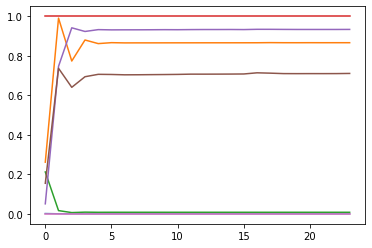

step: 1/4, D_loss: 1.1424147, G_loss_U: 2.594947, G_loss_S: 0.05110857, E_loss_t0: 16.586637


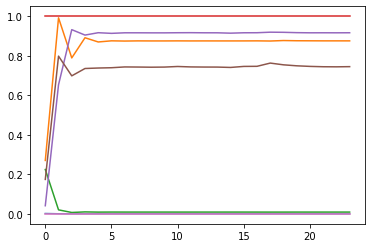

step: 1/4, D_loss: 0.76186764, G_loss_U: 2.714921, G_loss_S: 0.05120339, E_loss_t0: 16.664053


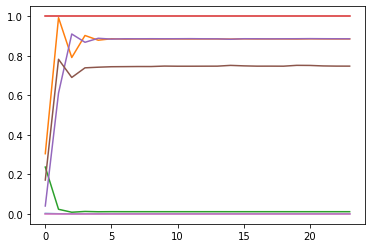

step: 1/4, D_loss: 0.939419, G_loss_U: 2.7475643, G_loss_S: 0.051889136, E_loss_t0: 16.585463


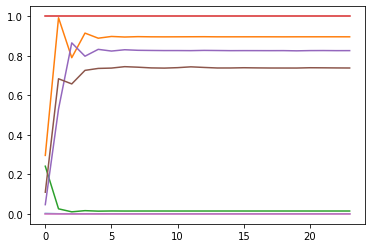

step: 1/4, D_loss: 1.0513227, G_loss_U: 2.7475114, G_loss_S: 0.053237308, E_loss_t0: 16.533762


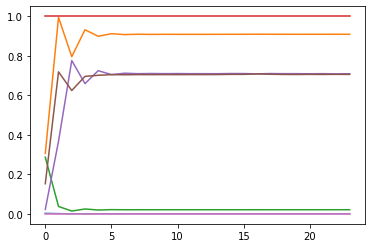

step: 1/4, D_loss: 1.0437818, G_loss_U: 2.7331448, G_loss_S: 0.05553271, E_loss_t0: 16.603586


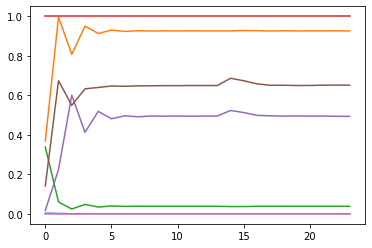

step: 1/4, D_loss: 0.9645898, G_loss_U: 2.7145555, G_loss_S: 0.058975182, E_loss_t0: 16.284883


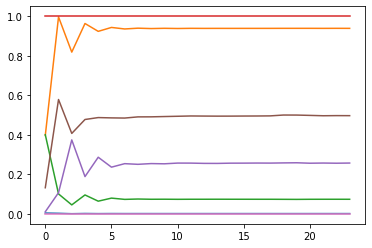

step: 1/4, D_loss: 0.8624342, G_loss_U: 2.6979346, G_loss_S: 0.062624894, E_loss_t0: 16.451809


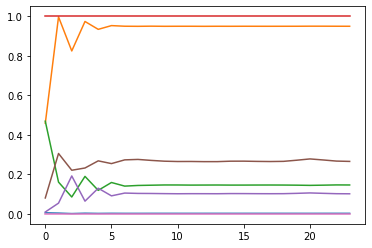

step: 1/4, D_loss: 0.7433875, G_loss_U: 2.689272, G_loss_S: 0.06736433, E_loss_t0: 16.528


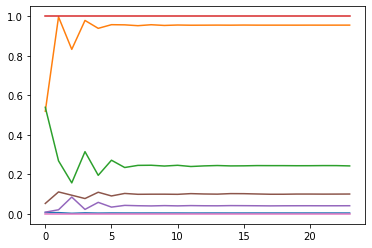

step: 1/4, D_loss: 0.62576014, G_loss_U: 2.6950185, G_loss_S: 0.07280086, E_loss_t0: 16.394264


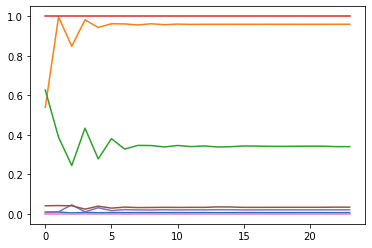

step: 1/4, D_loss: 0.5229124, G_loss_U: 2.7205985, G_loss_S: 0.07778359, E_loss_t0: 16.453047


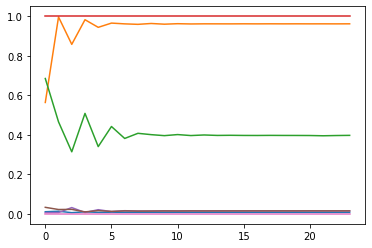

step: 1/4, D_loss: 0.43740952, G_loss_U: 2.7683237, G_loss_S: 0.0827818, E_loss_t0: 16.47585


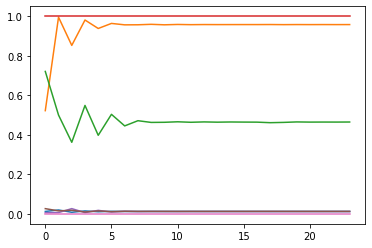

step: 1/4, D_loss: 0.36787406, G_loss_U: 2.8368323, G_loss_S: 0.08719648, E_loss_t0: 16.281834


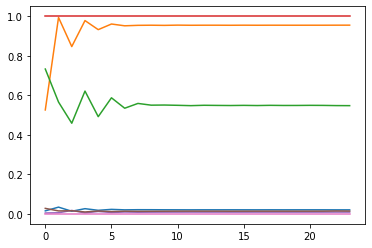

step: 1/4, D_loss: 0.31242135, G_loss_U: 2.9225512, G_loss_S: 0.09122958, E_loss_t0: 16.473444


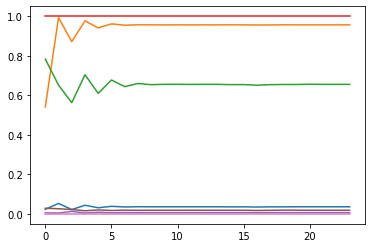

step: 1/4, D_loss: 0.2689572, G_loss_U: 3.0212739, G_loss_S: 0.09484595, E_loss_t0: 16.357843


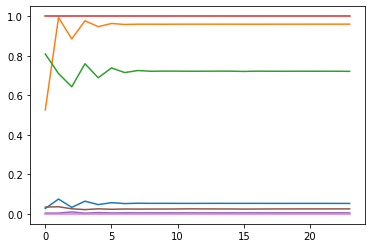

step: 1/4, D_loss: 0.23259382, G_loss_U: 3.1292229, G_loss_S: 0.097759746, E_loss_t0: 16.62576


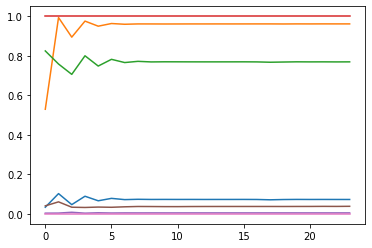

step: 1/4, D_loss: 0.20320359, G_loss_U: 3.242843, G_loss_S: 0.10041284, E_loss_t0: 16.672413


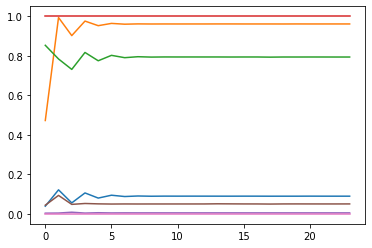

step: 1/4, D_loss: 0.17935494, G_loss_U: 3.358802, G_loss_S: 0.10224124, E_loss_t0: 16.598104


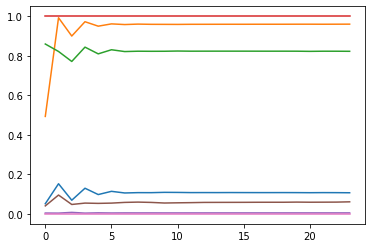

step: 1/4, D_loss: 0.1587093, G_loss_U: 3.4745328, G_loss_S: 0.103811994, E_loss_t0: 16.397602


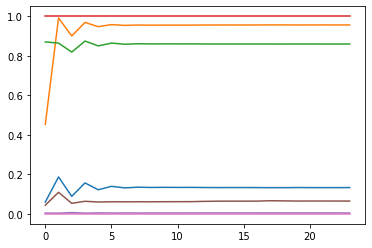

step: 1/4, D_loss: 0.1415218, G_loss_U: 3.4743404, G_loss_S: 0.10472733, E_loss_t0: 16.68268


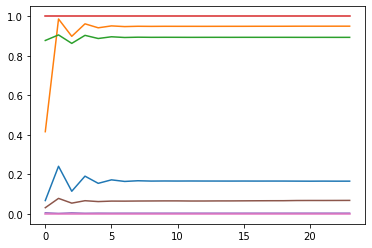

step: 1/4, D_loss: 0.14178069, G_loss_U: 3.4741383, G_loss_S: 0.10530291, E_loss_t0: 16.394749


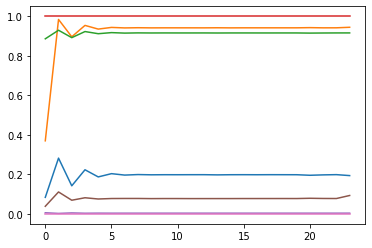

step: 1/4, D_loss: 0.14176896, G_loss_U: 3.4739234, G_loss_S: 0.105703294, E_loss_t0: 16.430996


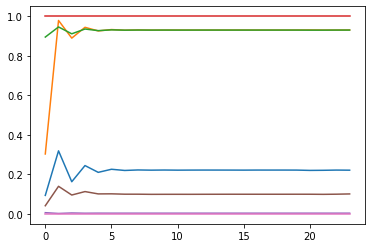

step: 1/4, D_loss: 0.14133725, G_loss_U: 3.4736953, G_loss_S: 0.10550399, E_loss_t0: 16.683485


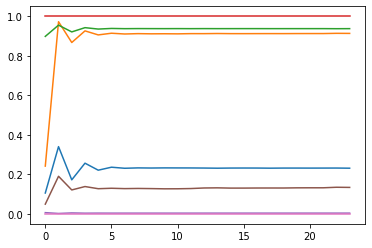

step: 1/4, D_loss: 0.14214112, G_loss_U: 3.473449, G_loss_S: 0.10504791, E_loss_t0: 16.408772


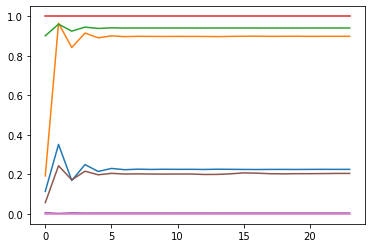

step: 1/4, D_loss: 0.14262848, G_loss_U: 3.473183, G_loss_S: 0.10436077, E_loss_t0: 16.299608


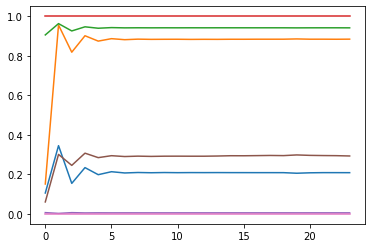

step: 1/4, D_loss: 0.14251477, G_loss_U: 3.4728916, G_loss_S: 0.103890084, E_loss_t0: 16.46181


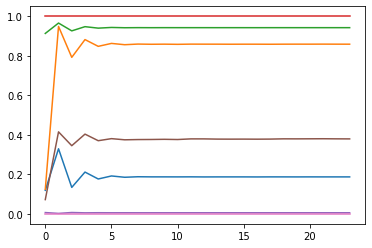

step: 1/4, D_loss: 0.14301588, G_loss_U: 3.4725688, G_loss_S: 0.10296217, E_loss_t0: 16.555325


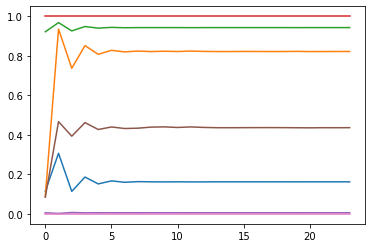

step: 1/4, D_loss: 0.14340882, G_loss_U: 3.4722066, G_loss_S: 0.1020512, E_loss_t0: 16.453144


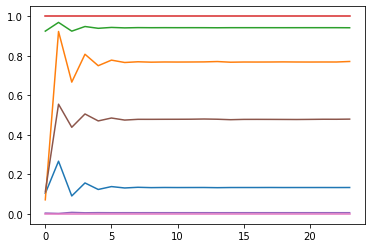

step: 1/4, D_loss: 0.14420289, G_loss_U: 3.4717944, G_loss_S: 0.100530125, E_loss_t0: 16.632158


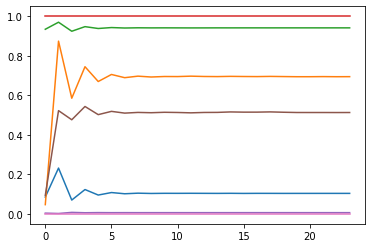

step: 1/4, D_loss: 0.14479429, G_loss_U: 3.4713175, G_loss_S: 0.0992797, E_loss_t0: 16.6272


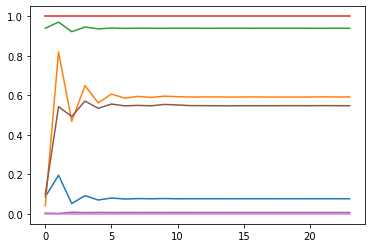

step: 1/4, D_loss: 0.14571607, G_loss_U: 3.4707606, G_loss_S: 0.09794064, E_loss_t0: 16.425398


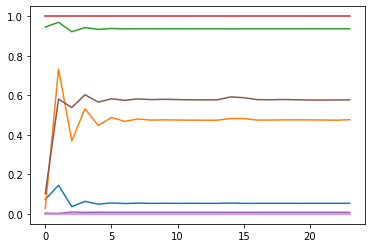

step: 1/4, D_loss: 0.14603825, G_loss_U: 3.4701033, G_loss_S: 0.09640721, E_loss_t0: 16.649944


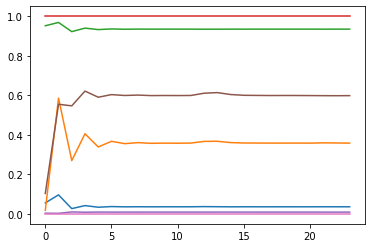

step: 1/4, D_loss: 0.14731555, G_loss_U: 3.4693282, G_loss_S: 0.09534889, E_loss_t0: 16.45595


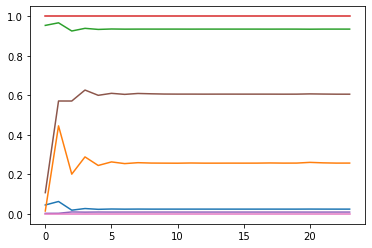

step: 1/4, D_loss: 0.14792328, G_loss_U: 3.4684212, G_loss_S: 0.093919545, E_loss_t0: 16.640059


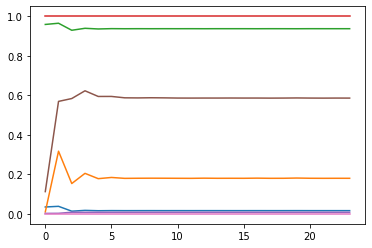

step: 1/4, D_loss: 0.14874393, G_loss_U: 3.4673786, G_loss_S: 0.09231658, E_loss_t0: 16.411495


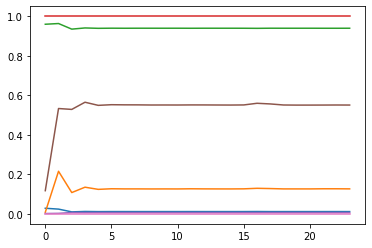

step: 1/4, D_loss: 0.14923412, G_loss_U: 3.4662147, G_loss_S: 0.091186725, E_loss_t0: 16.444086


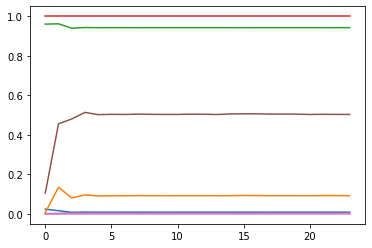

step: 1/4, D_loss: 0.15129112, G_loss_U: 3.5793266, G_loss_S: 0.08960236, E_loss_t0: 16.599972


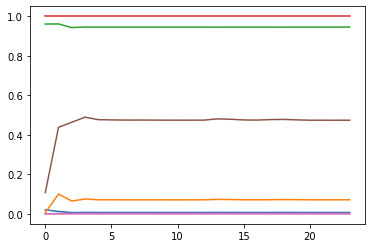

step: 1/4, D_loss: 0.13715018, G_loss_U: 3.5780687, G_loss_S: 0.0879655, E_loss_t0: 16.30417


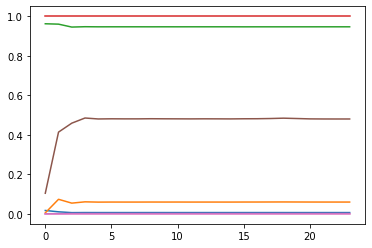

step: 1/4, D_loss: 0.13774295, G_loss_U: 3.5767026, G_loss_S: 0.08681972, E_loss_t0: 16.469187


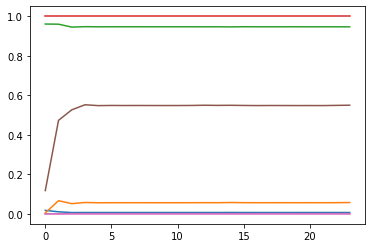

step: 1/4, D_loss: 0.13806133, G_loss_U: 3.5751069, G_loss_S: 0.085584216, E_loss_t0: 16.509869


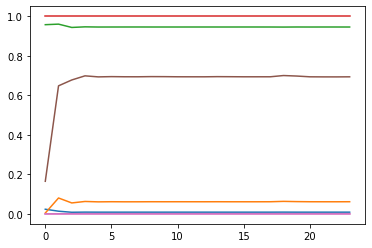

step: 1/4, D_loss: 0.14064288, G_loss_U: 3.5730538, G_loss_S: 0.08424749, E_loss_t0: 16.34117


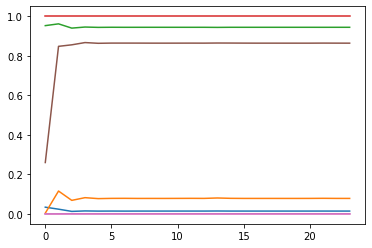

step: 1/4, D_loss: 0.14253643, G_loss_U: 3.5703118, G_loss_S: 0.08298334, E_loss_t0: 16.39793


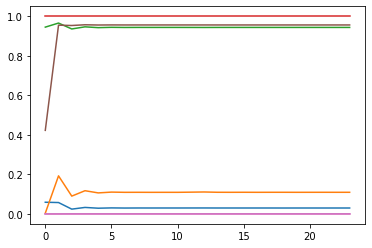

step: 1/4, D_loss: 0.14353788, G_loss_U: 3.5669944, G_loss_S: 0.08115744, E_loss_t0: 16.530497


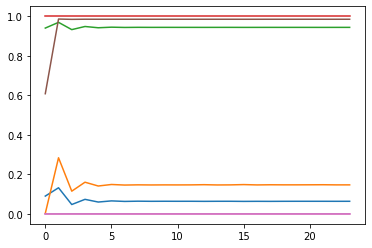

step: 1/4, D_loss: 0.14422074, G_loss_U: 3.5637743, G_loss_S: 0.08030314, E_loss_t0: 16.595476


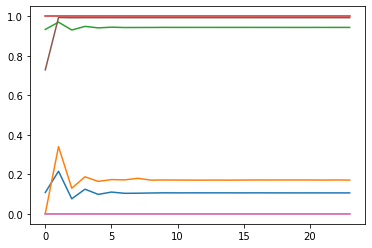

step: 1/4, D_loss: 0.1477577, G_loss_U: 3.561368, G_loss_S: 0.078551665, E_loss_t0: 16.620869


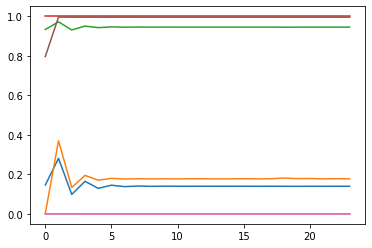

step: 1/4, D_loss: 0.14779808, G_loss_U: 3.5598936, G_loss_S: 0.07800883, E_loss_t0: 16.390324


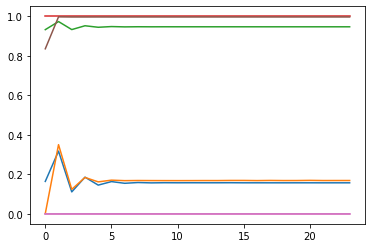

step: 1/4, D_loss: 0.15012813, G_loss_U: 3.6711643, G_loss_S: 0.076148145, E_loss_t0: 16.577623


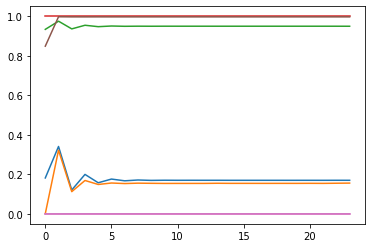

step: 1/4, D_loss: 0.1350812, G_loss_U: 3.6706314, G_loss_S: 0.075398065, E_loss_t0: 16.51734


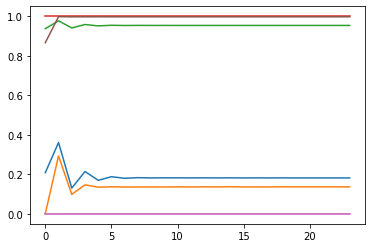

step: 1/4, D_loss: 0.13563386, G_loss_U: 3.6702116, G_loss_S: 0.073814735, E_loss_t0: 16.534079


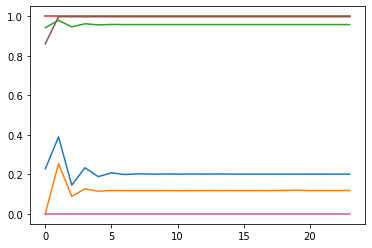

step: 1/4, D_loss: 0.13728386, G_loss_U: 3.6698132, G_loss_S: 0.073173285, E_loss_t0: 16.507565


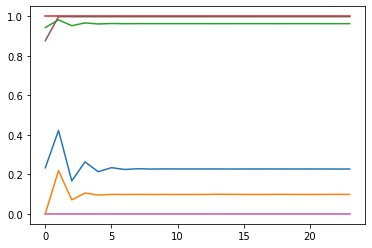

step: 1/4, D_loss: 0.13798772, G_loss_U: 3.669382, G_loss_S: 0.07146767, E_loss_t0: 16.415842


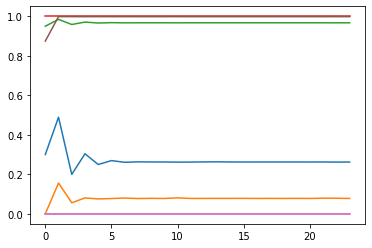

step: 1/4, D_loss: 0.14409217, G_loss_U: 3.6688857, G_loss_S: 0.07082312, E_loss_t0: 16.429205


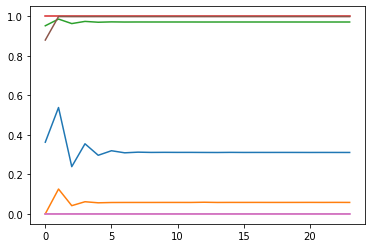

step: 1/4, D_loss: 0.14230119, G_loss_U: 3.6683025, G_loss_S: 0.06968167, E_loss_t0: 16.367304


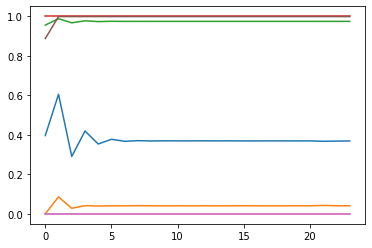

step: 1/4, D_loss: 0.14616588, G_loss_U: 3.6676264, G_loss_S: 0.06874705, E_loss_t0: 16.417841


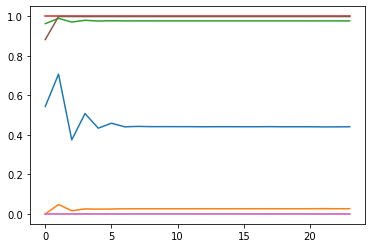

step: 1/4, D_loss: 0.14475843, G_loss_U: 3.6668704, G_loss_S: 0.067581825, E_loss_t0: 16.361544


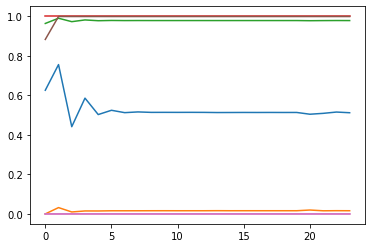

step: 1/4, D_loss: 0.14660093, G_loss_U: 3.6660762, G_loss_S: 0.06635824, E_loss_t0: 16.497076


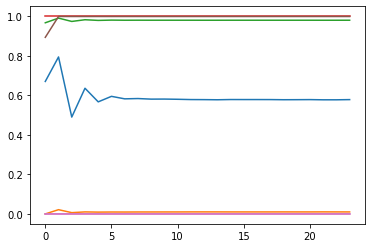

step: 1/4, D_loss: 0.14949048, G_loss_U: 3.6653037, G_loss_S: 0.065422446, E_loss_t0: 16.563646


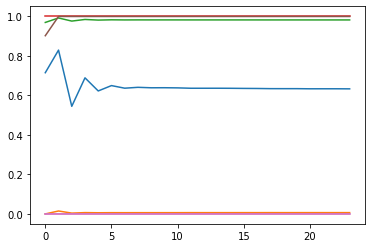

step: 1/4, D_loss: 0.1470888, G_loss_U: 3.6646128, G_loss_S: 0.06453041, E_loss_t0: 16.34757


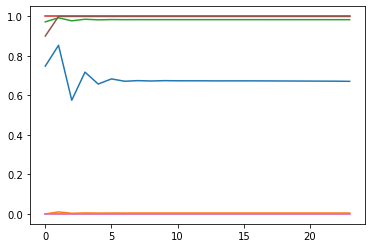

step: 1/4, D_loss: 0.15704212, G_loss_U: 3.7661304, G_loss_S: 0.06330916, E_loss_t0: 16.557184


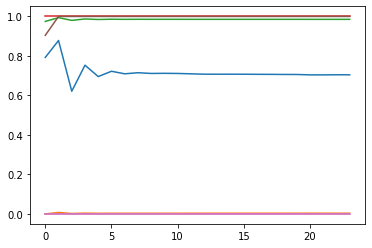

step: 1/4, D_loss: 0.13443136, G_loss_U: 3.7657175, G_loss_S: 0.06259736, E_loss_t0: 16.438808


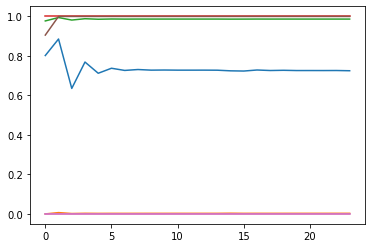

step: 1/4, D_loss: 0.1410838, G_loss_U: 3.7654197, G_loss_S: 0.06184286, E_loss_t0: 16.469872


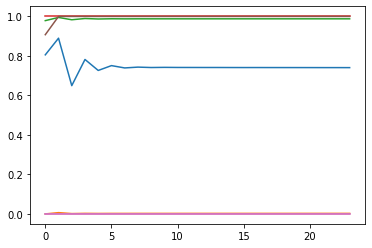

step: 1/4, D_loss: 0.13584559, G_loss_U: 3.7652075, G_loss_S: 0.060890883, E_loss_t0: 16.723518


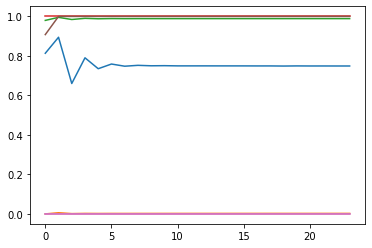

step: 1/4, D_loss: 0.13559116, G_loss_U: 3.7650547, G_loss_S: 0.06065053, E_loss_t0: 16.303144


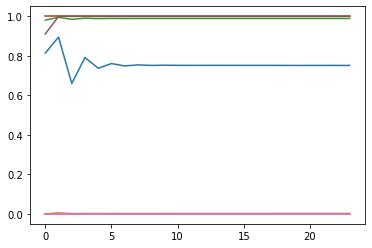

step: 1/4, D_loss: 0.13509046, G_loss_U: 3.764943, G_loss_S: 0.059380732, E_loss_t0: 16.423199


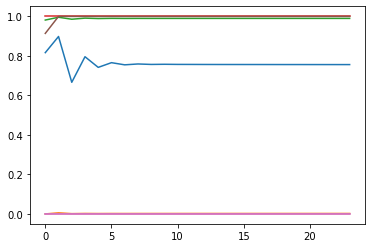

step: 1/4, D_loss: 0.13515384, G_loss_U: 3.7648594, G_loss_S: 0.05866792, E_loss_t0: 16.39494


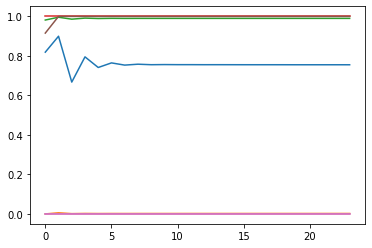

step: 1/4, D_loss: 0.13694309, G_loss_U: 3.7647948, G_loss_S: 0.058054905, E_loss_t0: 16.485695


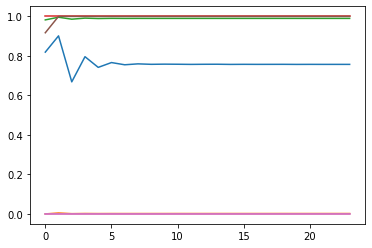

step: 1/4, D_loss: 0.13832968, G_loss_U: 3.7647426, G_loss_S: 0.05725456, E_loss_t0: 16.414446


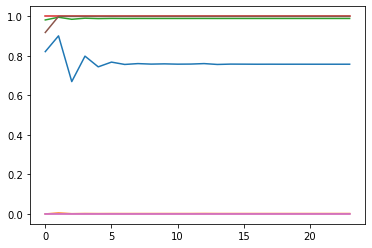

step: 1/4, D_loss: 0.13922891, G_loss_U: 3.7647, G_loss_S: 0.056355003, E_loss_t0: 16.585085


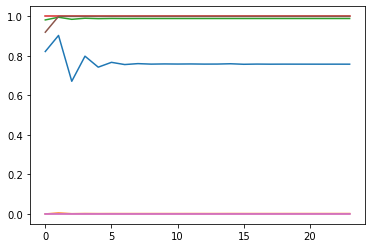

step: 1/4, D_loss: 0.14034265, G_loss_U: 3.7646627, G_loss_S: 0.055497866, E_loss_t0: 16.58033


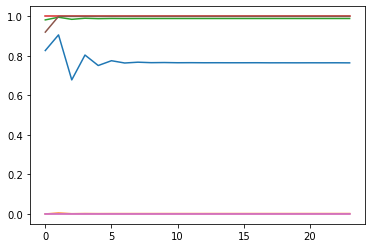

step: 1/4, D_loss: 0.1395283, G_loss_U: 3.7646294, G_loss_S: 0.054957625, E_loss_t0: 16.376394


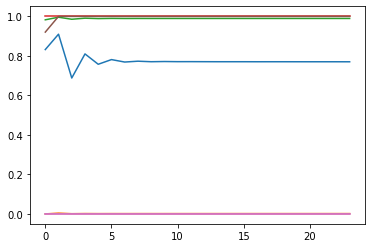

step: 1/4, D_loss: 0.1382209, G_loss_U: 3.7645986, G_loss_S: 0.054194465, E_loss_t0: 16.487967


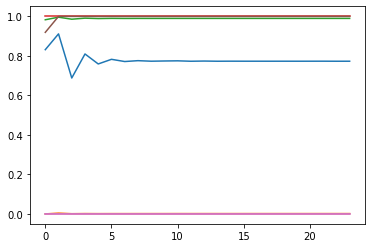

step: 1/4, D_loss: 0.14794108, G_loss_U: 3.7645695, G_loss_S: 0.053425077, E_loss_t0: 16.415743


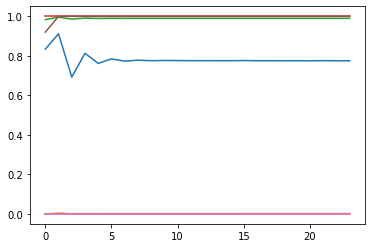

step: 1/4, D_loss: 0.14066975, G_loss_U: 3.7645419, G_loss_S: 0.0525162, E_loss_t0: 16.367697


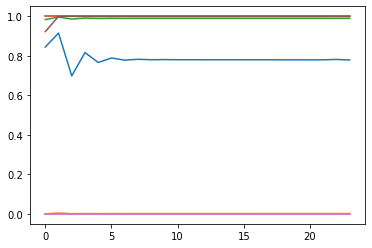

step: 1/4, D_loss: 0.14723551, G_loss_U: 3.7645135, G_loss_S: 0.051936347, E_loss_t0: 16.545454


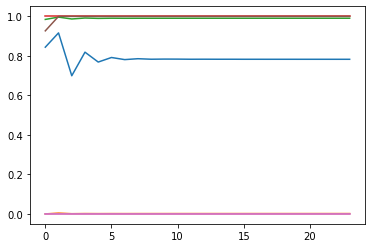

step: 1/4, D_loss: 0.14907011, G_loss_U: 3.7644854, G_loss_S: 0.051153053, E_loss_t0: 16.424932


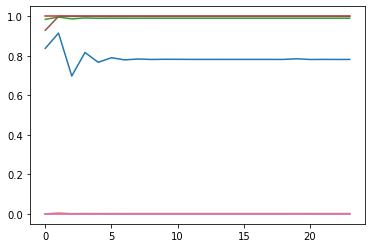

step: 1/4, D_loss: 0.14817545, G_loss_U: 3.7644563, G_loss_S: 0.050168745, E_loss_t0: 16.42828


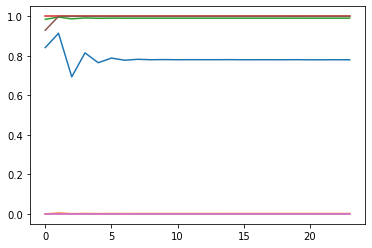

step: 1/4, D_loss: 0.16088359, G_loss_U: 3.859338, G_loss_S: 0.049659736, E_loss_t0: 16.465246


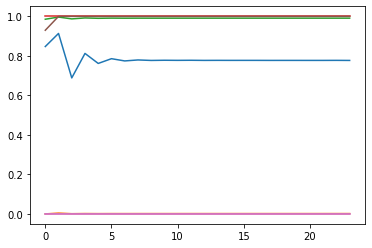

step: 1/4, D_loss: 0.13586994, G_loss_U: 3.8593059, G_loss_S: 0.04946716, E_loss_t0: 16.245916


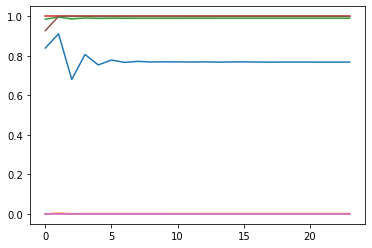

step: 1/4, D_loss: 0.13787302, G_loss_U: 3.8592706, G_loss_S: 0.04873592, E_loss_t0: 16.50934


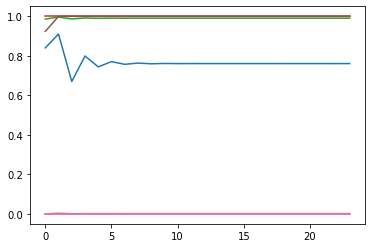

step: 1/4, D_loss: 0.13165335, G_loss_U: 3.8592327, G_loss_S: 0.048448693, E_loss_t0: 16.470875


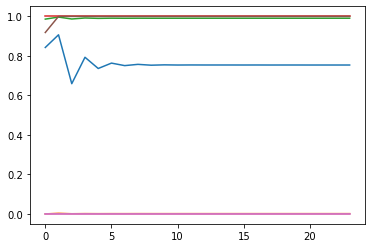

step: 1/4, D_loss: 0.13500519, G_loss_U: 3.8591893, G_loss_S: 0.047678858, E_loss_t0: 16.506796


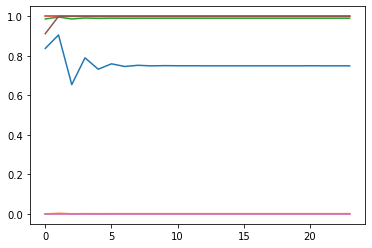

step: 1/4, D_loss: 0.13320753, G_loss_U: 3.8591413, G_loss_S: 0.04719129, E_loss_t0: 16.47418


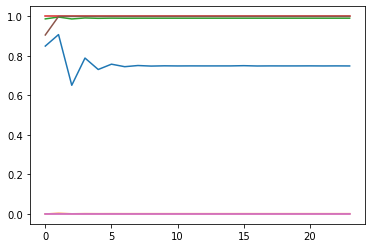

step: 1/4, D_loss: 0.13299482, G_loss_U: 3.8590858, G_loss_S: 0.047032923, E_loss_t0: 16.353514


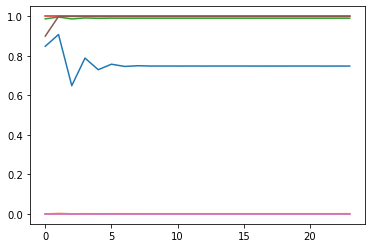

step: 1/4, D_loss: 0.13725252, G_loss_U: 3.8590217, G_loss_S: 0.046102256, E_loss_t0: 16.694908


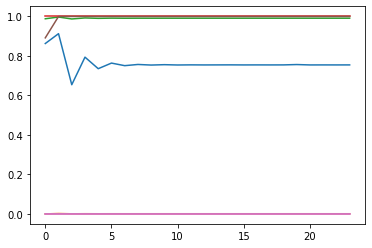

step: 1/4, D_loss: 0.13990438, G_loss_U: 3.8589468, G_loss_S: 0.04560888, E_loss_t0: 16.522444


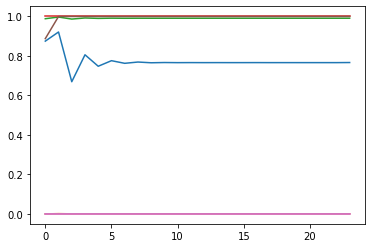

step: 1/4, D_loss: 0.14168118, G_loss_U: 3.8588583, G_loss_S: 0.045084175, E_loss_t0: 16.49984


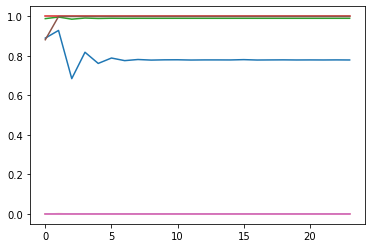

step: 1/4, D_loss: 0.1387377, G_loss_U: 3.858753, G_loss_S: 0.044639897, E_loss_t0: 16.48907


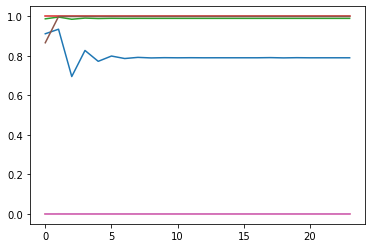

step: 1/4, D_loss: 0.13990146, G_loss_U: 3.8586283, G_loss_S: 0.04393203, E_loss_t0: 16.67312


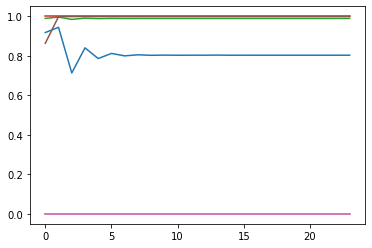

step: 1/4, D_loss: 0.14043096, G_loss_U: 3.8584805, G_loss_S: 0.043433882, E_loss_t0: 16.42621


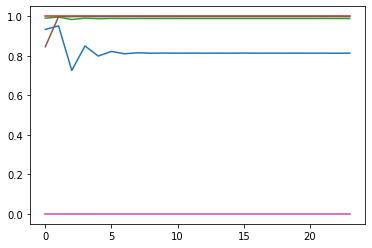

step: 1/4, D_loss: 0.13960673, G_loss_U: 3.8583097, G_loss_S: 0.042611524, E_loss_t0: 16.365837


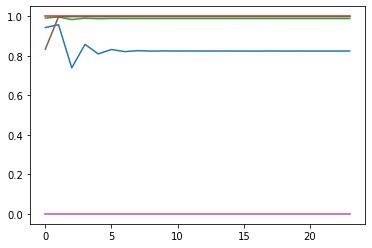

step: 1/4, D_loss: 0.14304811, G_loss_U: 3.8581178, G_loss_S: 0.042197317, E_loss_t0: 16.39344


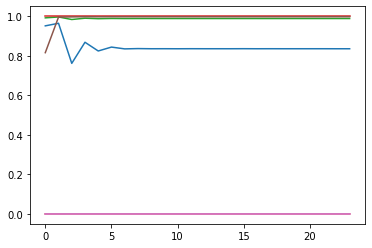

step: 2/4, D_loss: 0.15209651, G_loss_U: 3.1281116, G_loss_S: 0.041120153, E_loss_t0: 16.58352


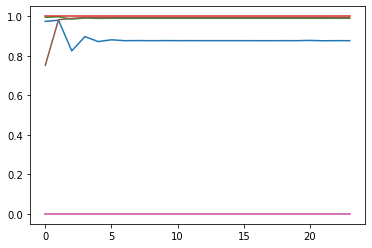

step: 2/4, D_loss: 0.18496196, G_loss_U: 2.8443024, G_loss_S: 0.040709835, E_loss_t0: 16.249987


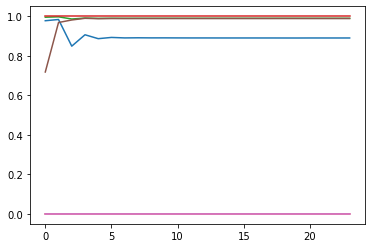

step: 2/4, D_loss: 0.22086887, G_loss_U: 2.9295714, G_loss_S: 0.040240247, E_loss_t0: 16.34157


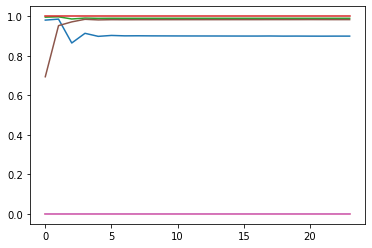

step: 2/4, D_loss: 0.18840986, G_loss_U: 2.9731693, G_loss_S: 0.03981004, E_loss_t0: 16.667437


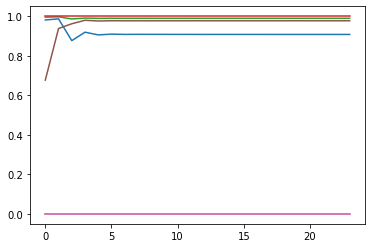

step: 2/4, D_loss: 0.17190073, G_loss_U: 2.996453, G_loss_S: 0.039564364, E_loss_t0: 16.43728


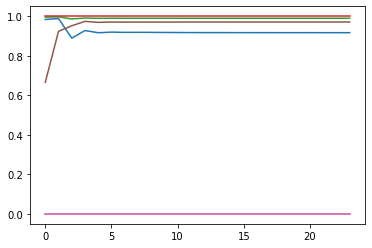

step: 2/4, D_loss: 0.1652632, G_loss_U: 3.0173607, G_loss_S: 0.039300606, E_loss_t0: 16.55642


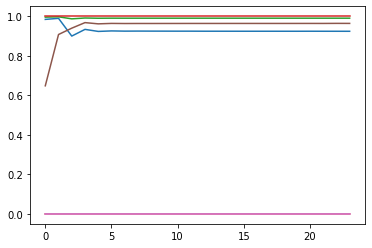

step: 2/4, D_loss: 0.16211969, G_loss_U: 3.0426178, G_loss_S: 0.03932109, E_loss_t0: 16.453432


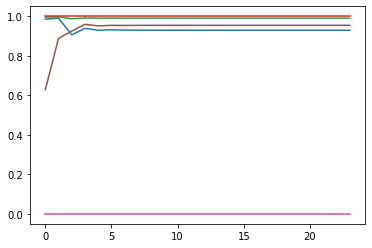

step: 2/4, D_loss: 0.16162321, G_loss_U: 3.071617, G_loss_S: 0.0391747, E_loss_t0: 16.393692


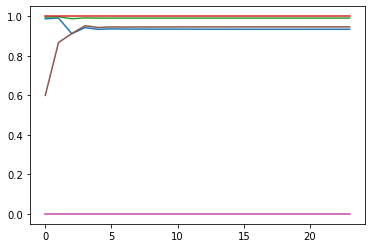

step: 2/4, D_loss: 0.15882944, G_loss_U: 3.1047516, G_loss_S: 0.039160255, E_loss_t0: 16.361439


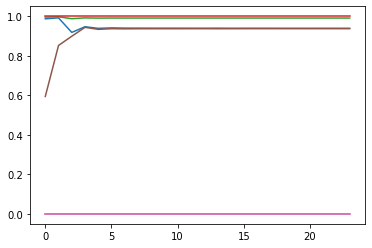

step: 2/4, D_loss: 0.14661069, G_loss_U: 3.1047394, G_loss_S: 0.039619174, E_loss_t0: 16.494963


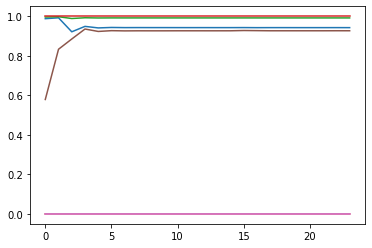

step: 2/4, D_loss: 0.14260633, G_loss_U: 3.1047213, G_loss_S: 0.039423864, E_loss_t0: 16.586498


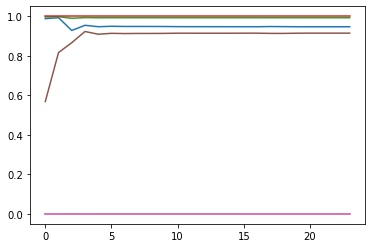

step: 2/4, D_loss: 0.1420484, G_loss_U: 3.1046958, G_loss_S: 0.039490994, E_loss_t0: 16.663935


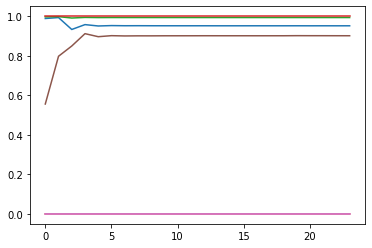

step: 2/4, D_loss: 0.14135009, G_loss_U: 3.10466, G_loss_S: 0.03953908, E_loss_t0: 16.585339


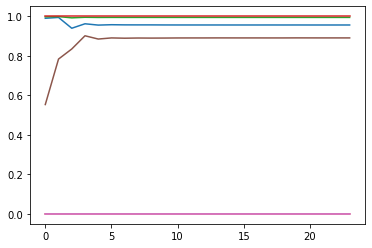

step: 2/4, D_loss: 0.13934179, G_loss_U: 3.1046135, G_loss_S: 0.039512467, E_loss_t0: 16.533617


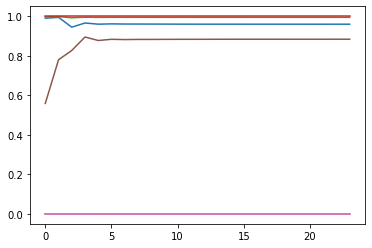

step: 2/4, D_loss: 0.14061555, G_loss_U: 3.1045547, G_loss_S: 0.039363295, E_loss_t0: 16.603403


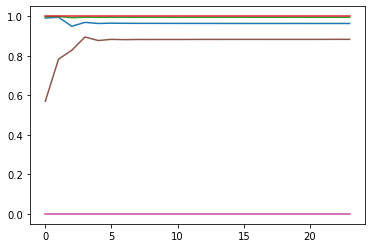

step: 2/4, D_loss: 0.13893667, G_loss_U: 3.1044798, G_loss_S: 0.039251108, E_loss_t0: 16.284655


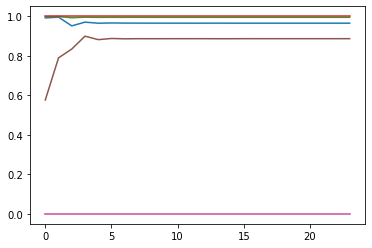

step: 2/4, D_loss: 0.13915998, G_loss_U: 3.1043863, G_loss_S: 0.03917813, E_loss_t0: 16.451525


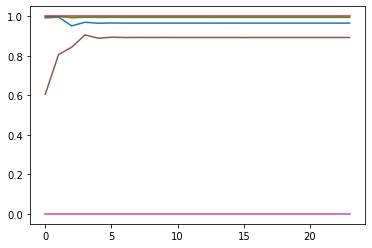

step: 2/4, D_loss: 0.13904014, G_loss_U: 3.104268, G_loss_S: 0.039003562, E_loss_t0: 16.527657


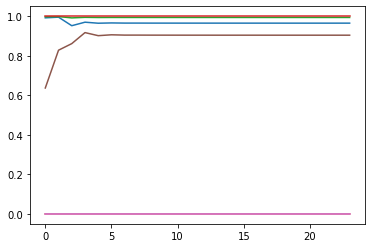

step: 2/4, D_loss: 0.13953064, G_loss_U: 3.1041162, G_loss_S: 0.038854815, E_loss_t0: 16.393843


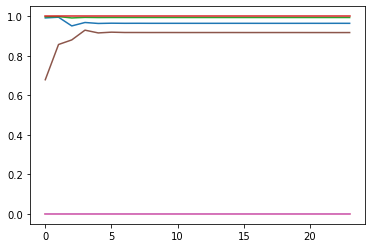

step: 2/4, D_loss: 0.14014119, G_loss_U: 3.1039164, G_loss_S: 0.038546257, E_loss_t0: 16.45259


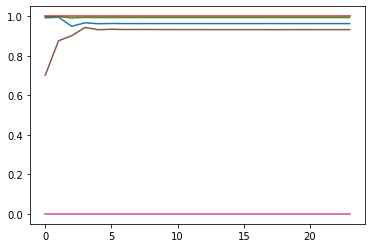

step: 2/4, D_loss: 0.14032999, G_loss_U: 3.1036484, G_loss_S: 0.03859653, E_loss_t0: 16.475353


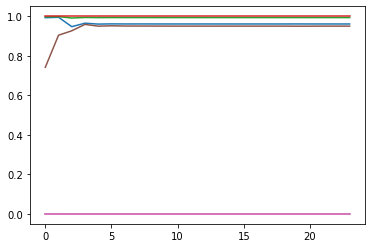

step: 2/4, D_loss: 0.14093095, G_loss_U: 3.103279, G_loss_S: 0.03801502, E_loss_t0: 16.281326


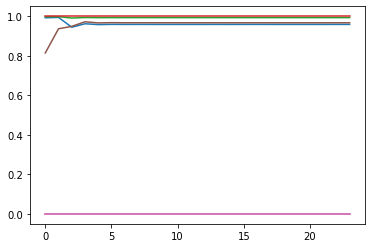

step: 2/4, D_loss: 0.14182007, G_loss_U: 3.1027663, G_loss_S: 0.037759162, E_loss_t0: 16.472927


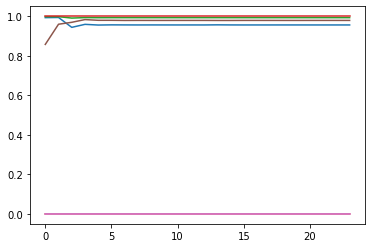

step: 2/4, D_loss: 0.14445427, G_loss_U: 3.1020687, G_loss_S: 0.03743372, E_loss_t0: 16.357374


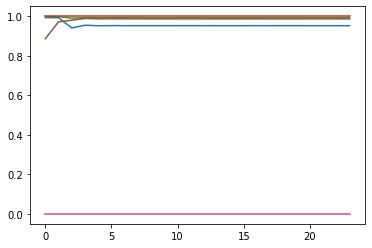

step: 2/4, D_loss: 0.14376546, G_loss_U: 3.101178, G_loss_S: 0.037016917, E_loss_t0: 16.625332


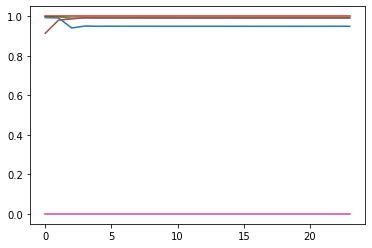

step: 2/4, D_loss: 0.1451286, G_loss_U: 3.1001668, G_loss_S: 0.036726184, E_loss_t0: 16.672


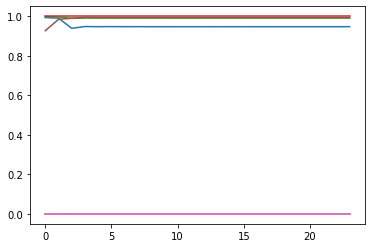

step: 2/4, D_loss: 0.14693628, G_loss_U: 3.099169, G_loss_S: 0.03638688, E_loss_t0: 16.597723


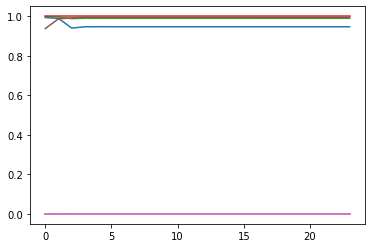

step: 2/4, D_loss: 0.14827931, G_loss_U: 3.098262, G_loss_S: 0.03607853, E_loss_t0: 16.397211


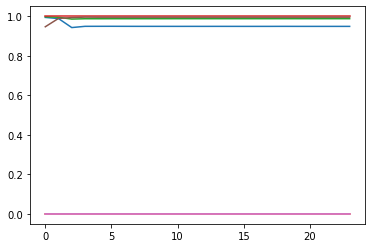

step: 2/4, D_loss: 0.15720305, G_loss_U: 3.137207, G_loss_S: 0.035592265, E_loss_t0: 16.682344


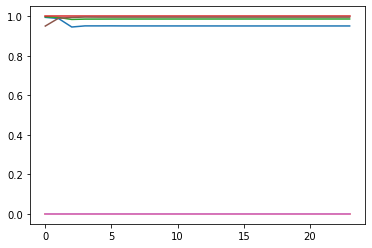

step: 2/4, D_loss: 0.14901099, G_loss_U: 3.1366765, G_loss_S: 0.035352036, E_loss_t0: 16.394434


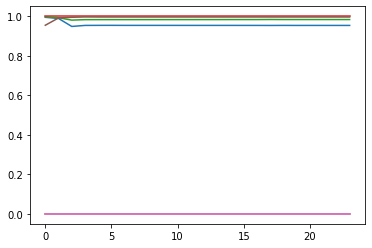

step: 2/4, D_loss: 0.14980498, G_loss_U: 3.136101, G_loss_S: 0.035076547, E_loss_t0: 16.430708


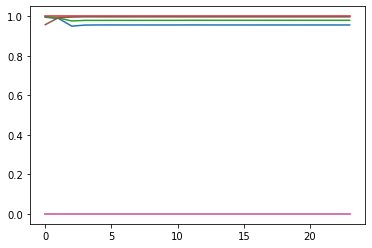

step: 2/4, D_loss: 0.14959444, G_loss_U: 3.1354978, G_loss_S: 0.034807935, E_loss_t0: 16.683243


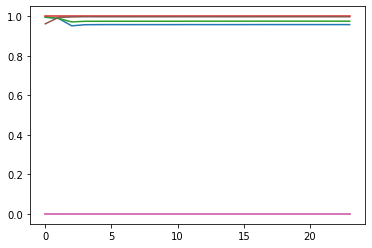

step: 2/4, D_loss: 0.15513645, G_loss_U: 3.1816254, G_loss_S: 0.034574665, E_loss_t0: 16.408531


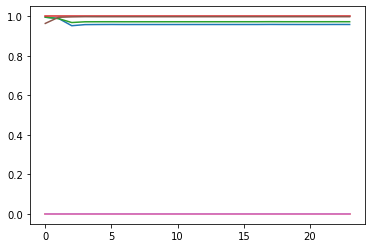

step: 2/4, D_loss: 0.14674252, G_loss_U: 3.1813293, G_loss_S: 0.034311105, E_loss_t0: 16.299377


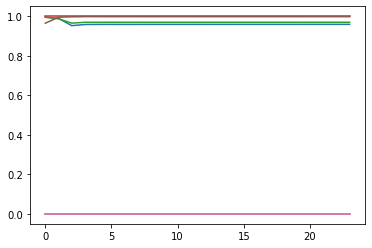

step: 2/4, D_loss: 0.14805907, G_loss_U: 3.181073, G_loss_S: 0.03421928, E_loss_t0: 16.461601


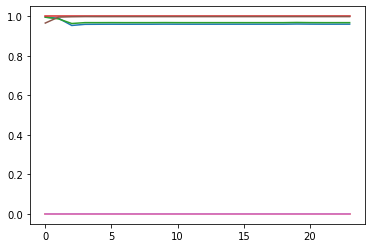

step: 2/4, D_loss: 0.15140644, G_loss_U: 3.2301202, G_loss_S: 0.034002423, E_loss_t0: 16.555136


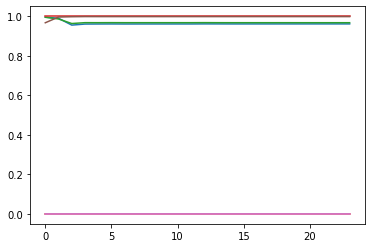

step: 2/4, D_loss: 0.14096412, G_loss_U: 3.2300034, G_loss_S: 0.03403206, E_loss_t0: 16.452961


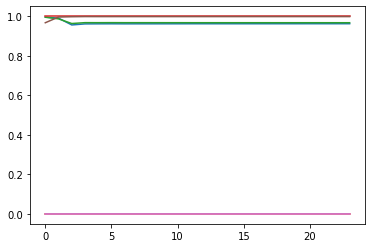

step: 2/4, D_loss: 0.13960727, G_loss_U: 3.2299078, G_loss_S: 0.033797026, E_loss_t0: 16.632002


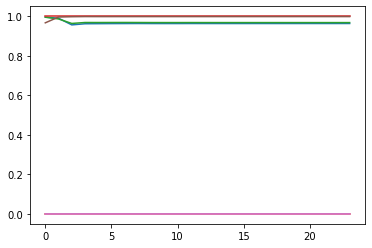

step: 2/4, D_loss: 0.13888456, G_loss_U: 3.2298305, G_loss_S: 0.033856194, E_loss_t0: 16.627045


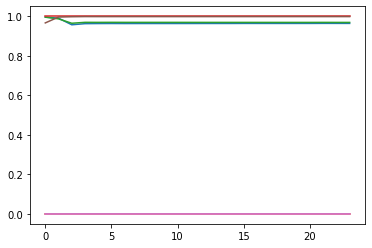

step: 2/4, D_loss: 0.13902004, G_loss_U: 3.2297666, G_loss_S: 0.033466555, E_loss_t0: 16.425264


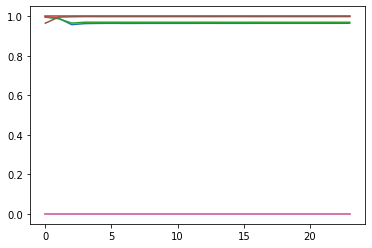

step: 2/4, D_loss: 0.14410156, G_loss_U: 3.2297134, G_loss_S: 0.033293817, E_loss_t0: 16.649828


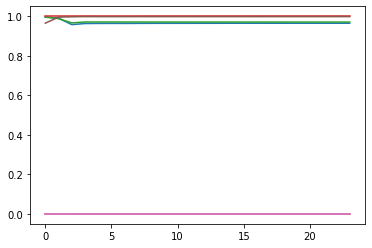

step: 2/4, D_loss: 0.14383797, G_loss_U: 3.2296667, G_loss_S: 0.033163313, E_loss_t0: 16.455845


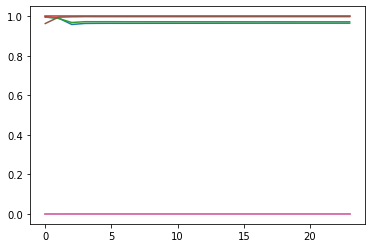

step: 2/4, D_loss: 0.14677233, G_loss_U: 3.2296243, G_loss_S: 0.032992385, E_loss_t0: 16.639963


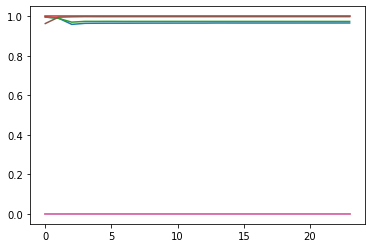

step: 2/4, D_loss: 0.14469337, G_loss_U: 3.2295856, G_loss_S: 0.032365963, E_loss_t0: 16.411415


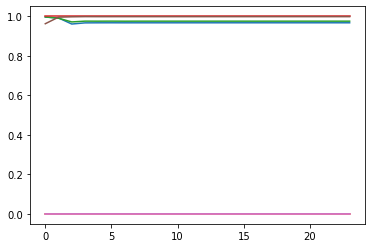

step: 2/4, D_loss: 0.14416842, G_loss_U: 3.2295485, G_loss_S: 0.032243438, E_loss_t0: 16.444


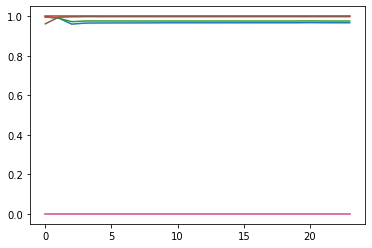

step: 2/4, D_loss: 0.1418684, G_loss_U: 3.2295113, G_loss_S: 0.032082923, E_loss_t0: 16.599892


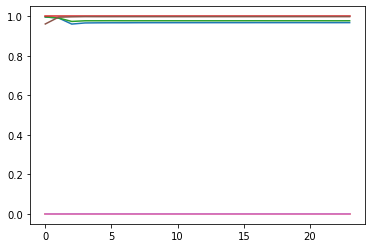

step: 2/4, D_loss: 0.1511016, G_loss_U: 3.281957, G_loss_S: 0.03163717, E_loss_t0: 16.304096


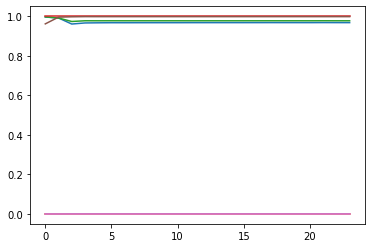

step: 2/4, D_loss: 0.13851263, G_loss_U: 3.2819297, G_loss_S: 0.031428084, E_loss_t0: 16.46912


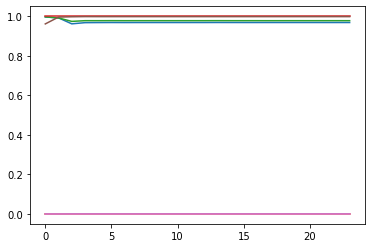

step: 2/4, D_loss: 0.13552321, G_loss_U: 3.2819014, G_loss_S: 0.031222198, E_loss_t0: 16.509808


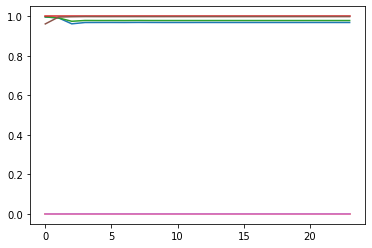

step: 2/4, D_loss: 0.14019775, G_loss_U: 3.2818708, G_loss_S: 0.030898513, E_loss_t0: 16.341114


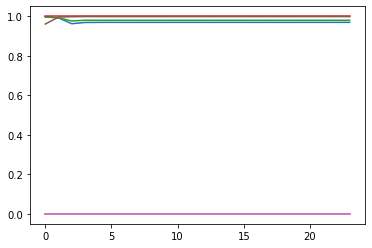

step: 2/4, D_loss: 0.14324272, G_loss_U: 3.281838, G_loss_S: 0.03072261, E_loss_t0: 16.397873


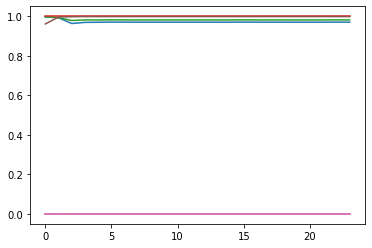

step: 2/4, D_loss: 0.14591542, G_loss_U: 3.2818024, G_loss_S: 0.030449223, E_loss_t0: 16.53044


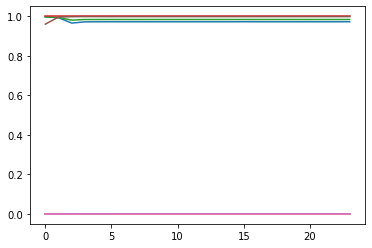

step: 2/4, D_loss: 0.14194797, G_loss_U: 3.281764, G_loss_S: 0.030220063, E_loss_t0: 16.595432


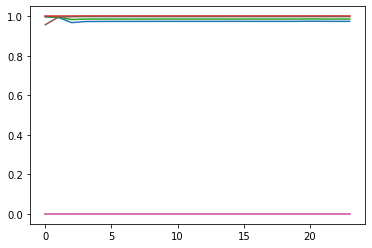

step: 2/4, D_loss: 0.15009077, G_loss_U: 3.334709, G_loss_S: 0.029781304, E_loss_t0: 16.620823


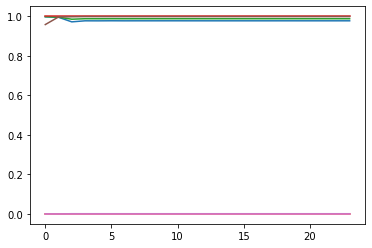

step: 2/4, D_loss: 0.1358476, G_loss_U: 3.3346822, G_loss_S: 0.029725518, E_loss_t0: 16.390284


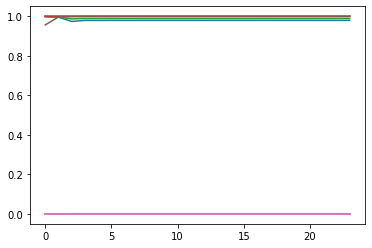

step: 2/4, D_loss: 0.13574216, G_loss_U: 3.3346517, G_loss_S: 0.029545056, E_loss_t0: 16.577589


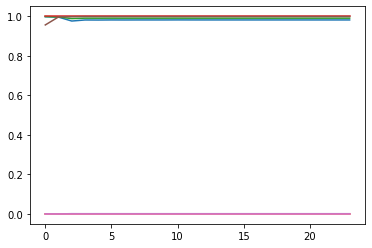

step: 2/4, D_loss: 0.131341, G_loss_U: 3.3346186, G_loss_S: 0.029339977, E_loss_t0: 16.517307


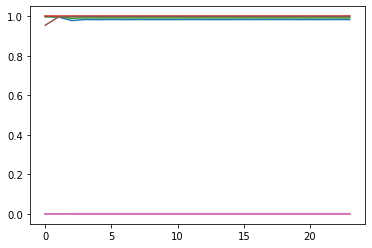

step: 2/4, D_loss: 0.13106664, G_loss_U: 3.3345823, G_loss_S: 0.029096223, E_loss_t0: 16.534046


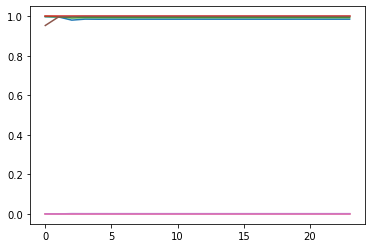

step: 2/4, D_loss: 0.13541836, G_loss_U: 3.3345444, G_loss_S: 0.02890676, E_loss_t0: 16.507534


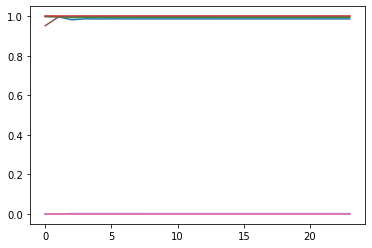

step: 2/4, D_loss: 0.1339673, G_loss_U: 3.3345063, G_loss_S: 0.028544651, E_loss_t0: 16.415813


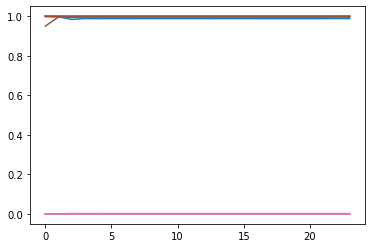

step: 2/4, D_loss: 0.13696228, G_loss_U: 3.3344686, G_loss_S: 0.028470831, E_loss_t0: 16.429174


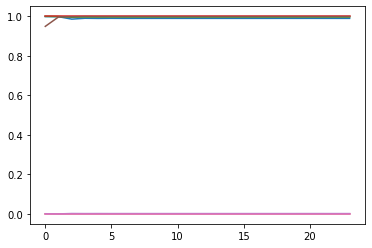

step: 2/4, D_loss: 0.13603568, G_loss_U: 3.3344312, G_loss_S: 0.028014788, E_loss_t0: 16.367273


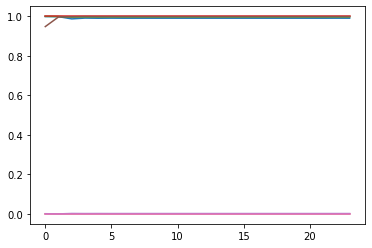

step: 2/4, D_loss: 0.13773093, G_loss_U: 3.3343954, G_loss_S: 0.02789907, E_loss_t0: 16.417805


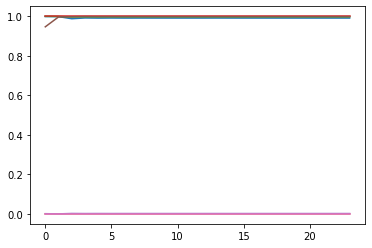

step: 2/4, D_loss: 0.13555545, G_loss_U: 3.3343616, G_loss_S: 0.027521398, E_loss_t0: 16.361513


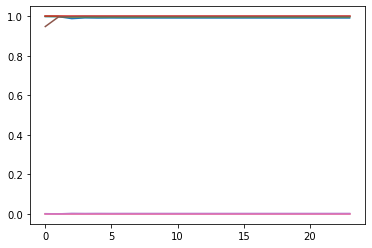

step: 2/4, D_loss: 0.14034837, G_loss_U: 3.33433, G_loss_S: 0.027214838, E_loss_t0: 16.497044


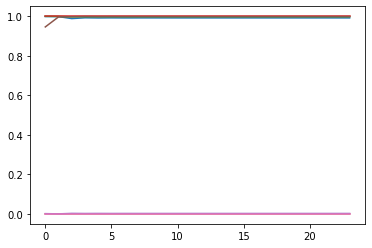

step: 2/4, D_loss: 0.14761479, G_loss_U: 3.3343, G_loss_S: 0.026958099, E_loss_t0: 16.563616


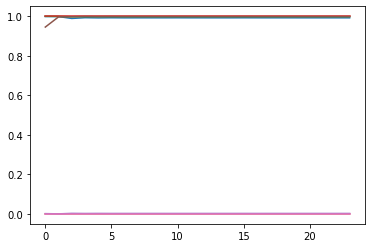

step: 2/4, D_loss: 0.14699191, G_loss_U: 3.3342717, G_loss_S: 0.026708325, E_loss_t0: 16.347534


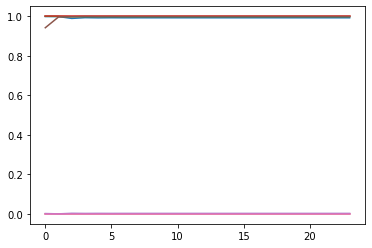

step: 2/4, D_loss: 0.16144833, G_loss_U: 3.3820238, G_loss_S: 0.026210085, E_loss_t0: 16.557156


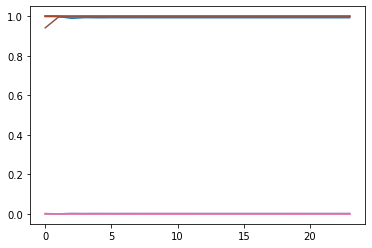

step: 2/4, D_loss: 0.13529724, G_loss_U: 3.3820007, G_loss_S: 0.026237164, E_loss_t0: 16.438782


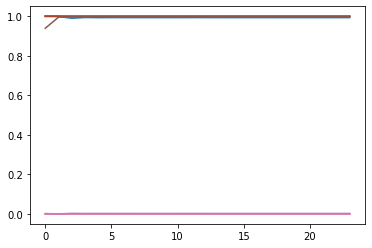

step: 2/4, D_loss: 0.13165829, G_loss_U: 3.3819752, G_loss_S: 0.026198076, E_loss_t0: 16.469843


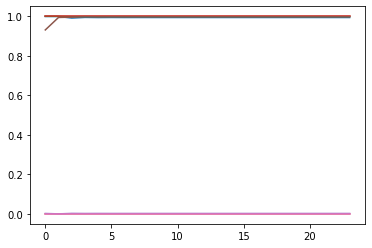

step: 2/4, D_loss: 0.13389184, G_loss_U: 3.3819466, G_loss_S: 0.026100827, E_loss_t0: 16.72349


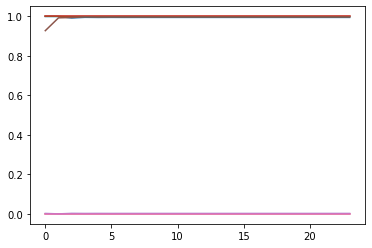

step: 2/4, D_loss: 0.13303433, G_loss_U: 3.3819144, G_loss_S: 0.026088387, E_loss_t0: 16.303114


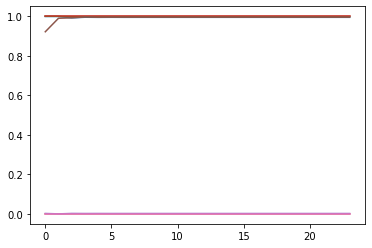

step: 2/4, D_loss: 0.1287562, G_loss_U: 3.3818786, G_loss_S: 0.025947062, E_loss_t0: 16.423157


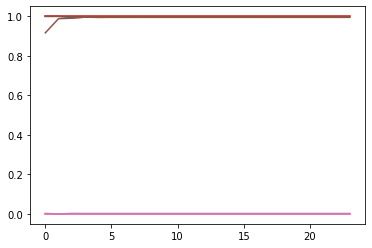

step: 2/4, D_loss: 0.12869275, G_loss_U: 3.3818398, G_loss_S: 0.025798744, E_loss_t0: 16.394903


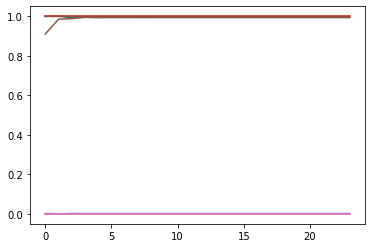

step: 2/4, D_loss: 0.13138402, G_loss_U: 3.3817983, G_loss_S: 0.025663763, E_loss_t0: 16.48566


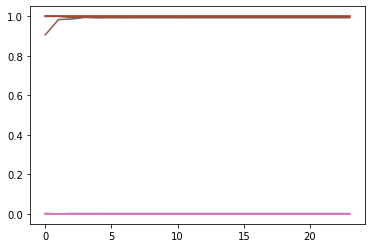

step: 2/4, D_loss: 0.13599162, G_loss_U: 3.3817558, G_loss_S: 0.025399668, E_loss_t0: 16.414398


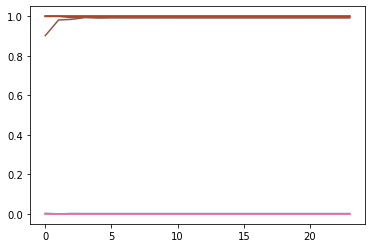

step: 2/4, D_loss: 0.13157932, G_loss_U: 3.381714, G_loss_S: 0.025285114, E_loss_t0: 16.585043


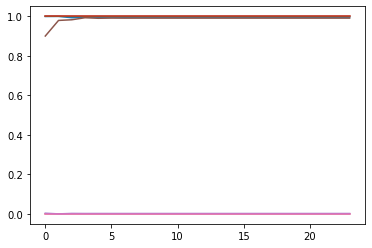

step: 2/4, D_loss: 0.13515213, G_loss_U: 3.381675, G_loss_S: 0.025010252, E_loss_t0: 16.580288


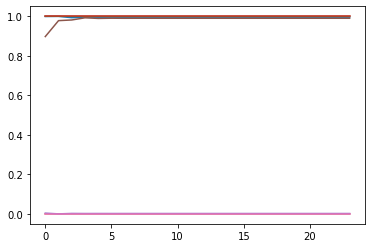

step: 2/4, D_loss: 0.13697794, G_loss_U: 3.3816407, G_loss_S: 0.024855724, E_loss_t0: 16.376354


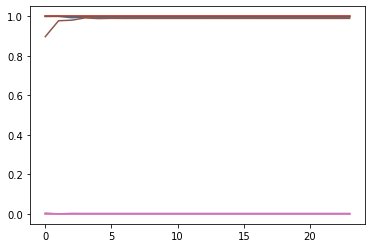

step: 2/4, D_loss: 0.14310063, G_loss_U: 3.3816137, G_loss_S: 0.02455759, E_loss_t0: 16.487925


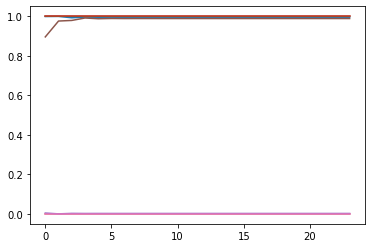

step: 2/4, D_loss: 0.14328356, G_loss_U: 3.3815944, G_loss_S: 0.024363456, E_loss_t0: 16.415695


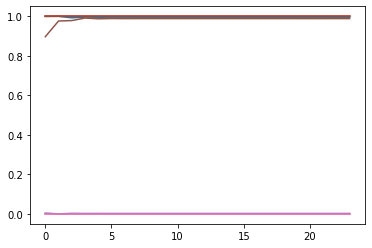

step: 2/4, D_loss: 0.14769131, G_loss_U: 3.381583, G_loss_S: 0.024009274, E_loss_t0: 16.367645


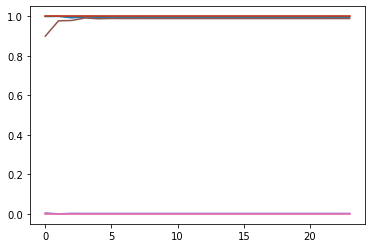

step: 2/4, D_loss: 0.15187953, G_loss_U: 3.4136405, G_loss_S: 0.023780871, E_loss_t0: 16.545406


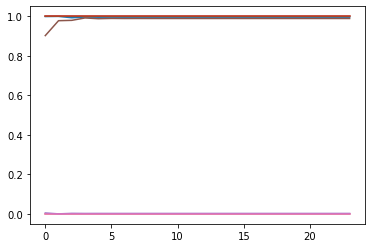

step: 2/4, D_loss: 0.123129524, G_loss_U: 3.4136376, G_loss_S: 0.024118003, E_loss_t0: 16.424894


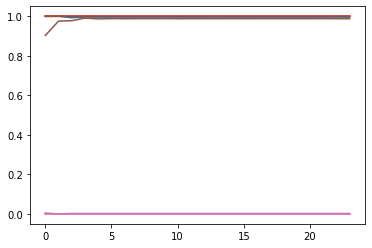

step: 2/4, D_loss: 0.1218377, G_loss_U: 3.4136367, G_loss_S: 0.02446396, E_loss_t0: 16.42825


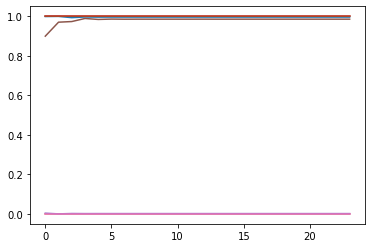

step: 2/4, D_loss: 0.12065231, G_loss_U: 3.413638, G_loss_S: 0.024836872, E_loss_t0: 16.465227


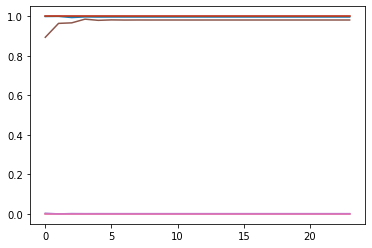

step: 2/4, D_loss: 0.12051962, G_loss_U: 3.4136412, G_loss_S: 0.025044413, E_loss_t0: 16.2459


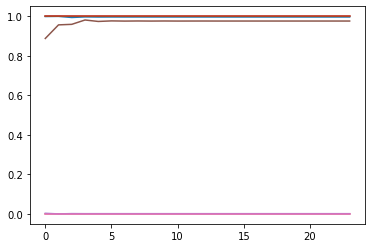

step: 2/4, D_loss: 0.11991521, G_loss_U: 3.4136434, G_loss_S: 0.025314018, E_loss_t0: 16.509335


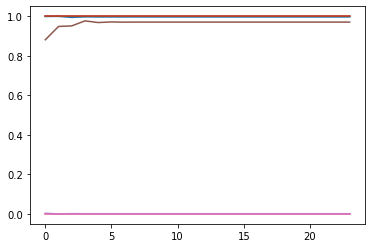

step: 2/4, D_loss: 0.119410165, G_loss_U: 3.4136465, G_loss_S: 0.025474684, E_loss_t0: 16.470871


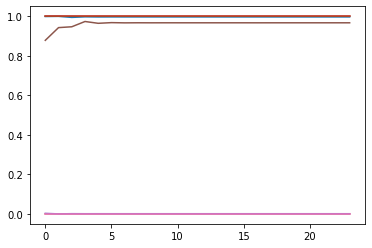

step: 2/4, D_loss: 0.1192867, G_loss_U: 3.4136477, G_loss_S: 0.025602208, E_loss_t0: 16.506792


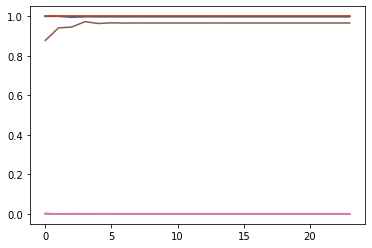

step: 2/4, D_loss: 0.11937439, G_loss_U: 3.4136484, G_loss_S: 0.025665948, E_loss_t0: 16.474173


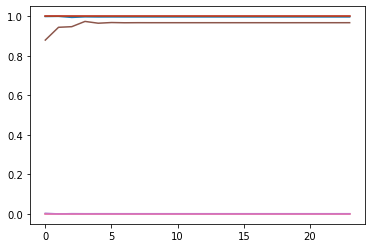

step: 2/4, D_loss: 0.119481094, G_loss_U: 3.4136477, G_loss_S: 0.025850007, E_loss_t0: 16.353506


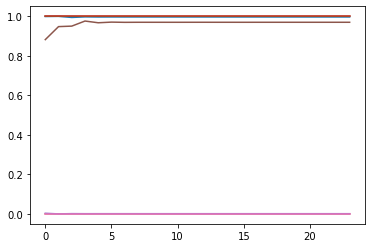

step: 2/4, D_loss: 0.11963231, G_loss_U: 3.4136457, G_loss_S: 0.025698254, E_loss_t0: 16.694895


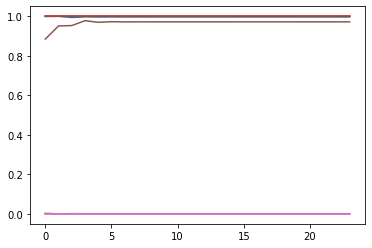

step: 2/4, D_loss: 0.12391385, G_loss_U: 3.413643, G_loss_S: 0.025822977, E_loss_t0: 16.522427


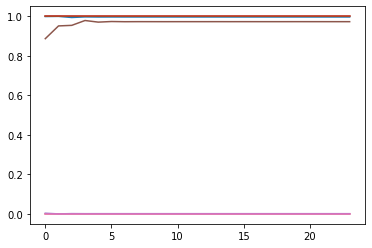

step: 2/4, D_loss: 0.12138349, G_loss_U: 3.413639, G_loss_S: 0.025704166, E_loss_t0: 16.499817


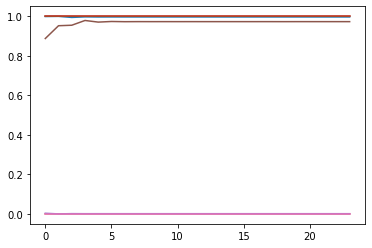

step: 2/4, D_loss: 0.12504134, G_loss_U: 3.4136345, G_loss_S: 0.025515728, E_loss_t0: 16.48905


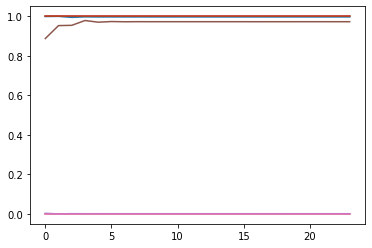

step: 2/4, D_loss: 0.12070769, G_loss_U: 3.4136295, G_loss_S: 0.025421485, E_loss_t0: 16.6731


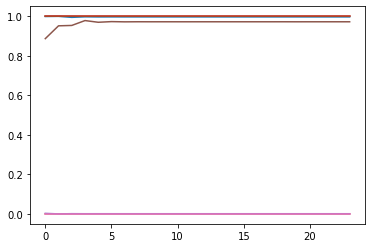

step: 2/4, D_loss: 0.12277174, G_loss_U: 3.4136236, G_loss_S: 0.0251997, E_loss_t0: 16.426184


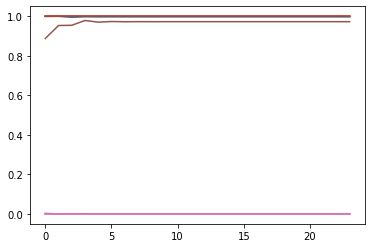

step: 2/4, D_loss: 0.1266739, G_loss_U: 3.4136176, G_loss_S: 0.024911338, E_loss_t0: 16.36581


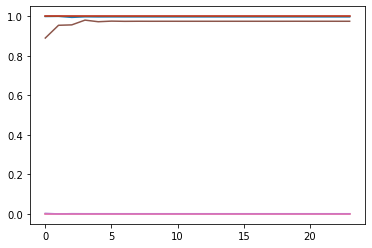

step: 2/4, D_loss: 0.12854394, G_loss_U: 3.4136117, G_loss_S: 0.024742482, E_loss_t0: 16.39341


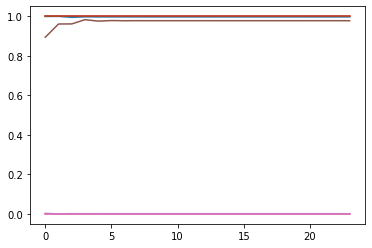

step: 3/4, D_loss: 0.15036681, G_loss_U: 2.6637375, G_loss_S: 0.024030648, E_loss_t0: 16.583488


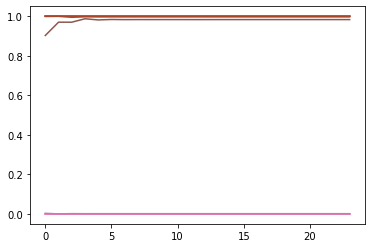

step: 3/4, D_loss: 0.18110727, G_loss_U: 2.3711567, G_loss_S: 0.02389106, E_loss_t0: 16.24995


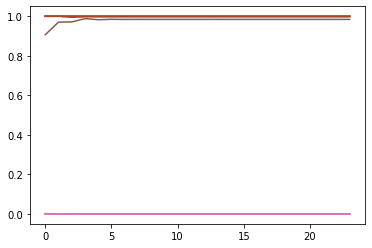

step: 3/4, D_loss: 0.22198723, G_loss_U: 2.1094308, G_loss_S: 0.023657333, E_loss_t0: 16.341532


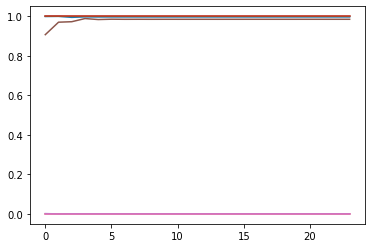

step: 3/4, D_loss: 0.27029097, G_loss_U: 2.264583, G_loss_S: 0.023648536, E_loss_t0: 16.667395


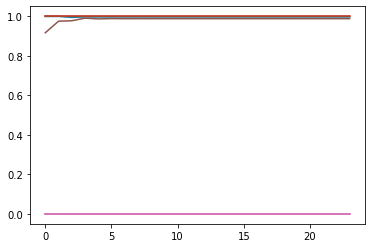

step: 3/4, D_loss: 0.23041412, G_loss_U: 2.3426092, G_loss_S: 0.023421701, E_loss_t0: 16.437239


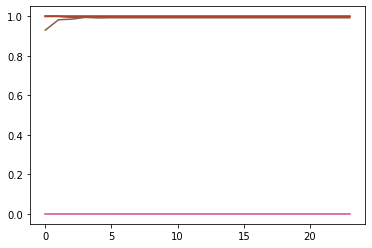

step: 3/4, D_loss: 0.21195047, G_loss_U: 2.410844, G_loss_S: 0.023256065, E_loss_t0: 16.556377


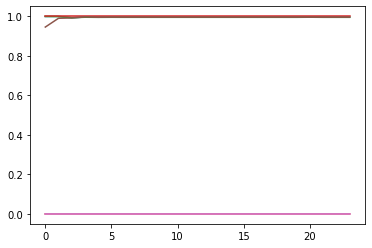

step: 3/4, D_loss: 0.1983778, G_loss_U: 2.4824064, G_loss_S: 0.023006843, E_loss_t0: 16.453392


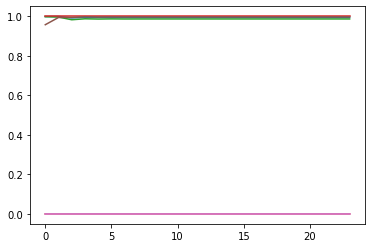

step: 3/4, D_loss: 0.18694472, G_loss_U: 2.5593722, G_loss_S: 0.022895485, E_loss_t0: 16.393648


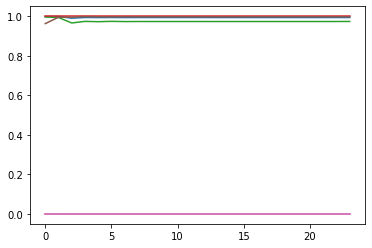

step: 3/4, D_loss: 0.17702727, G_loss_U: 2.6411989, G_loss_S: 0.022760214, E_loss_t0: 16.36139


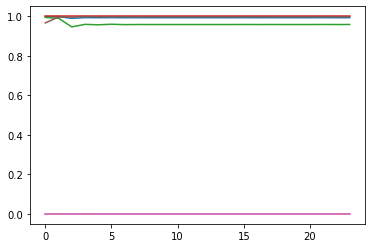

step: 3/4, D_loss: 0.17349572, G_loss_U: 2.7257726, G_loss_S: 0.02271582, E_loss_t0: 16.494896


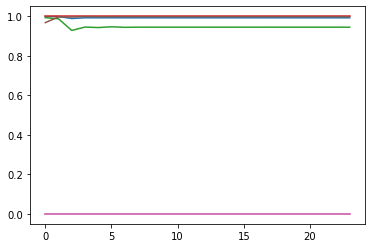

step: 3/4, D_loss: 0.17811467, G_loss_U: 2.8091452, G_loss_S: 0.022542411, E_loss_t0: 16.58643


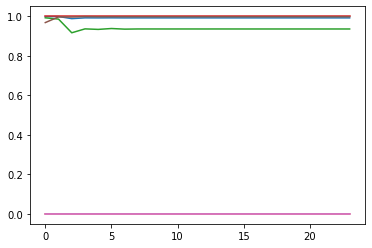

step: 3/4, D_loss: 0.16816555, G_loss_U: 2.8907516, G_loss_S: 0.022650784, E_loss_t0: 16.66386


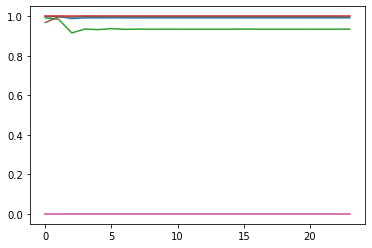

step: 3/4, D_loss: 0.16129035, G_loss_U: 2.9706607, G_loss_S: 0.02296454, E_loss_t0: 16.58527


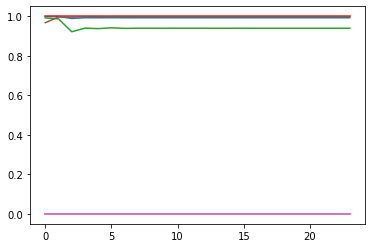

step: 3/4, D_loss: 0.1320501, G_loss_U: 2.9706643, G_loss_S: 0.023547199, E_loss_t0: 16.533552


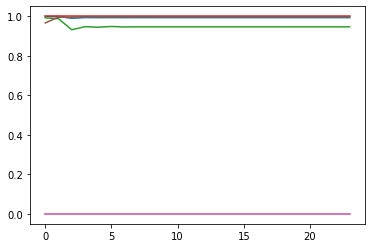

step: 3/4, D_loss: 0.12826847, G_loss_U: 2.9706638, G_loss_S: 0.023806646, E_loss_t0: 16.603352


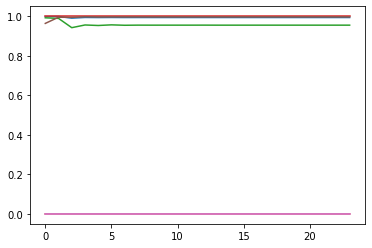

step: 3/4, D_loss: 0.12682927, G_loss_U: 2.9706624, G_loss_S: 0.02400686, E_loss_t0: 16.284609


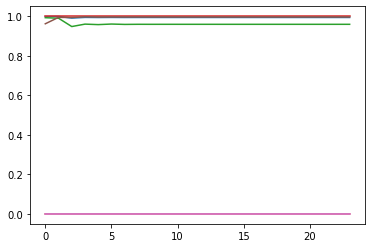

step: 3/4, D_loss: 0.1301337, G_loss_U: 2.9706597, G_loss_S: 0.024484744, E_loss_t0: 16.451498


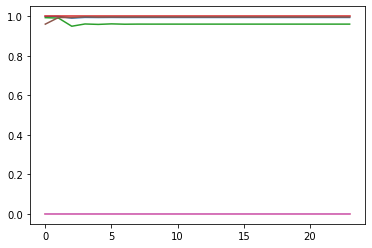

step: 3/4, D_loss: 0.124914624, G_loss_U: 2.9706569, G_loss_S: 0.024725804, E_loss_t0: 16.527632


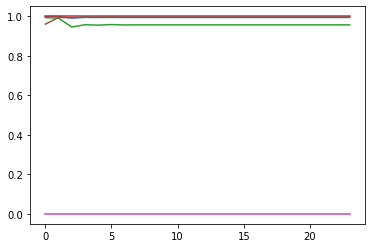

step: 3/4, D_loss: 0.12689996, G_loss_U: 2.9706538, G_loss_S: 0.024880927, E_loss_t0: 16.393816


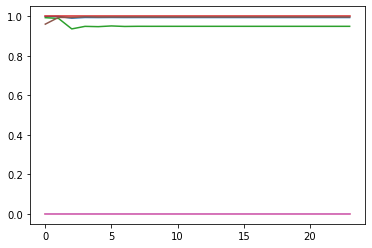

step: 3/4, D_loss: 0.13351355, G_loss_U: 2.9706511, G_loss_S: 0.02501048, E_loss_t0: 16.452568


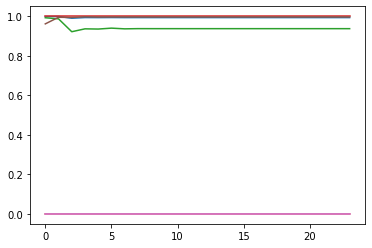

step: 3/4, D_loss: 0.124900706, G_loss_U: 2.9706478, G_loss_S: 0.02517694, E_loss_t0: 16.475336


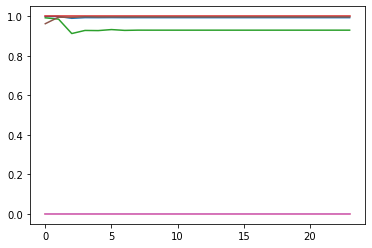

step: 3/4, D_loss: 0.12675193, G_loss_U: 2.970645, G_loss_S: 0.025178758, E_loss_t0: 16.281305


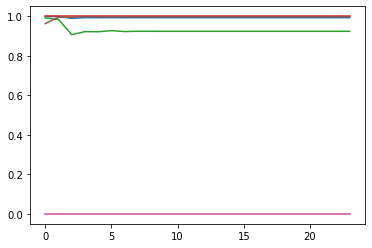

step: 3/4, D_loss: 0.12884438, G_loss_U: 2.9706426, G_loss_S: 0.025191922, E_loss_t0: 16.472897


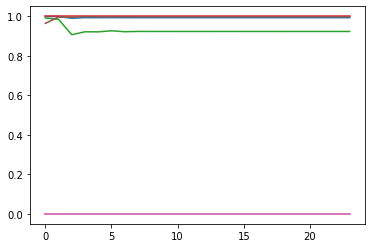

step: 3/4, D_loss: 0.12465684, G_loss_U: 2.9706397, G_loss_S: 0.02492503, E_loss_t0: 16.35734


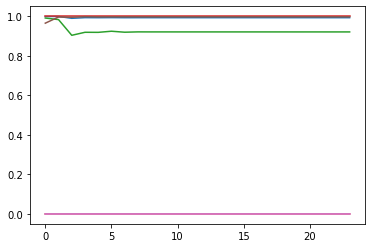

step: 3/4, D_loss: 0.1272606, G_loss_U: 2.9706368, G_loss_S: 0.024827603, E_loss_t0: 16.625301


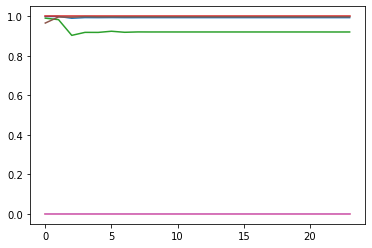

step: 3/4, D_loss: 0.12939927, G_loss_U: 2.9706342, G_loss_S: 0.024800425, E_loss_t0: 16.671968


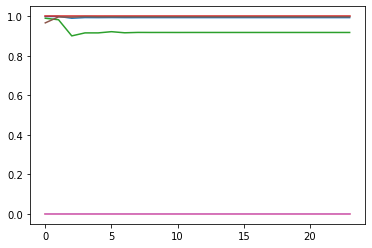

step: 3/4, D_loss: 0.13416253, G_loss_U: 2.9706314, G_loss_S: 0.024631778, E_loss_t0: 16.597689


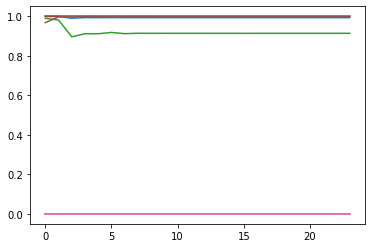

step: 3/4, D_loss: 0.13011315, G_loss_U: 2.9706287, G_loss_S: 0.024311852, E_loss_t0: 16.397177


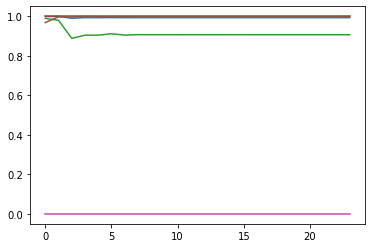

step: 3/4, D_loss: 0.13547485, G_loss_U: 2.9706259, G_loss_S: 0.024082184, E_loss_t0: 16.682308


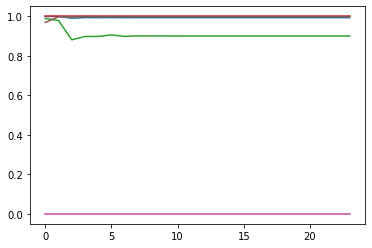

step: 3/4, D_loss: 0.13554938, G_loss_U: 2.9706228, G_loss_S: 0.023768276, E_loss_t0: 16.394396


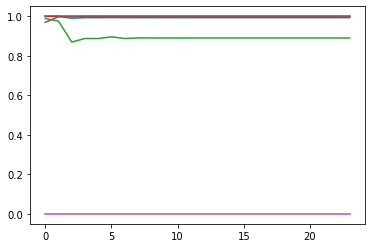

step: 3/4, D_loss: 0.13784933, G_loss_U: 2.9706202, G_loss_S: 0.023397453, E_loss_t0: 16.430668


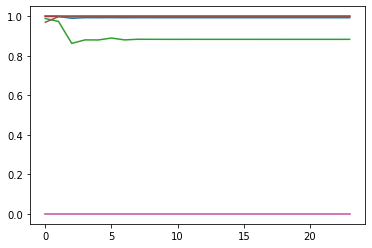

step: 3/4, D_loss: 0.14330408, G_loss_U: 2.9706173, G_loss_S: 0.023083985, E_loss_t0: 16.683203


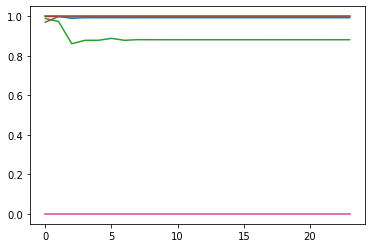

step: 3/4, D_loss: 0.14621595, G_loss_U: 2.9706147, G_loss_S: 0.022855, E_loss_t0: 16.40849


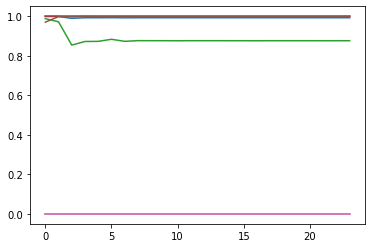

step: 3/4, D_loss: 0.14916489, G_loss_U: 2.9706118, G_loss_S: 0.022387879, E_loss_t0: 16.299334


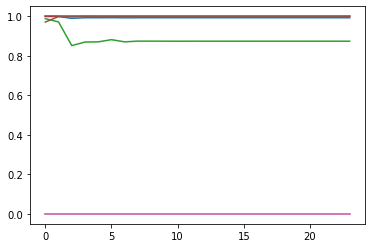

step: 3/4, D_loss: 0.160292, G_loss_U: 3.0447214, G_loss_S: 0.022003768, E_loss_t0: 16.461561


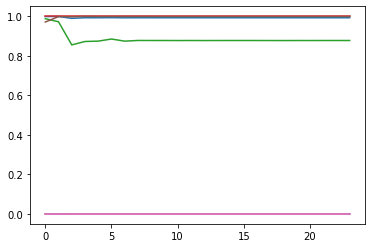

step: 3/4, D_loss: 0.12978427, G_loss_U: 3.0447176, G_loss_S: 0.02229227, E_loss_t0: 16.555096


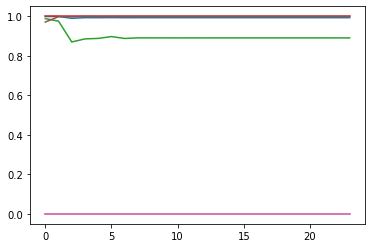

step: 3/4, D_loss: 0.119990885, G_loss_U: 3.0447137, G_loss_S: 0.022390403, E_loss_t0: 16.452923


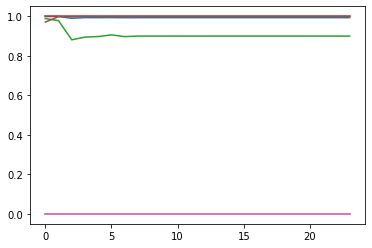

step: 3/4, D_loss: 0.1198236, G_loss_U: 3.0447097, G_loss_S: 0.022393886, E_loss_t0: 16.631966


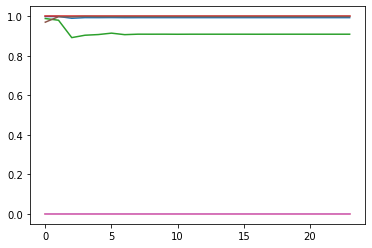

step: 3/4, D_loss: 0.11926029, G_loss_U: 3.0447054, G_loss_S: 0.022498664, E_loss_t0: 16.627018


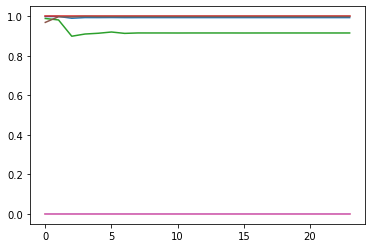

step: 3/4, D_loss: 0.119392134, G_loss_U: 3.0447013, G_loss_S: 0.022393098, E_loss_t0: 16.42523


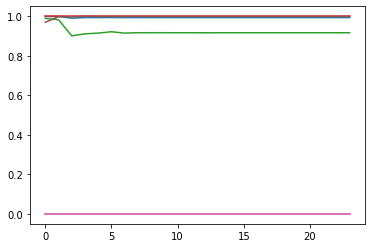

step: 3/4, D_loss: 0.11927234, G_loss_U: 3.0446966, G_loss_S: 0.02241323, E_loss_t0: 16.649788


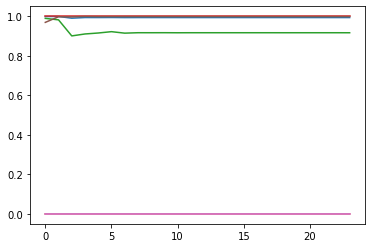

step: 3/4, D_loss: 0.11957909, G_loss_U: 3.044692, G_loss_S: 0.022333117, E_loss_t0: 16.455805


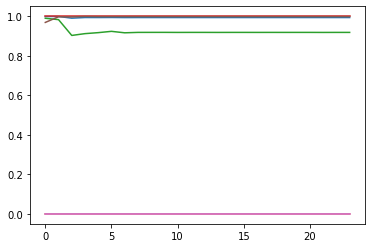

step: 3/4, D_loss: 0.11993226, G_loss_U: 3.044687, G_loss_S: 0.022205455, E_loss_t0: 16.639927


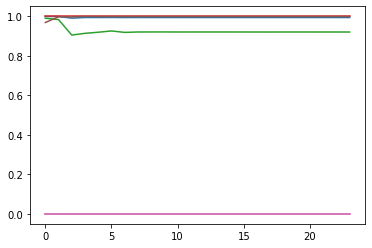

step: 3/4, D_loss: 0.12215142, G_loss_U: 3.0446818, G_loss_S: 0.021844279, E_loss_t0: 16.411371


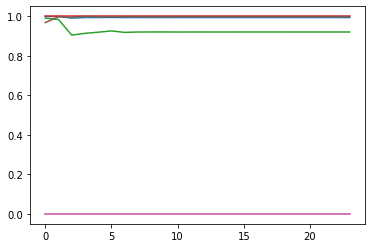

step: 3/4, D_loss: 0.12014712, G_loss_U: 3.044676, G_loss_S: 0.021745395, E_loss_t0: 16.443962


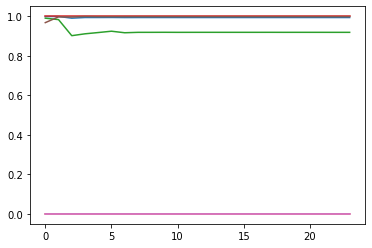

step: 3/4, D_loss: 0.12983218, G_loss_U: 3.0446699, G_loss_S: 0.021597907, E_loss_t0: 16.599854


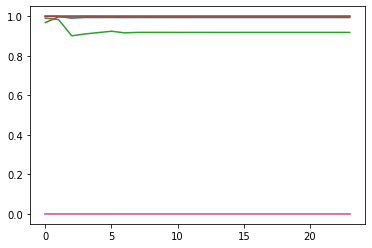

step: 3/4, D_loss: 0.13669564, G_loss_U: 3.0446637, G_loss_S: 0.021290611, E_loss_t0: 16.304054


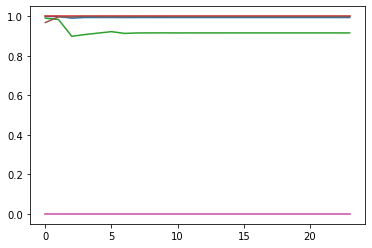

step: 3/4, D_loss: 0.12199075, G_loss_U: 3.044657, G_loss_S: 0.021087583, E_loss_t0: 16.46908


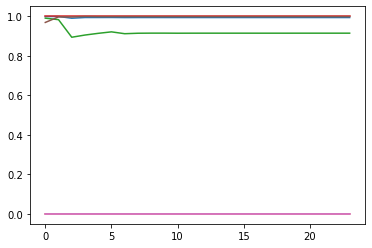

step: 3/4, D_loss: 0.12717153, G_loss_U: 3.0446494, G_loss_S: 0.020785788, E_loss_t0: 16.509768


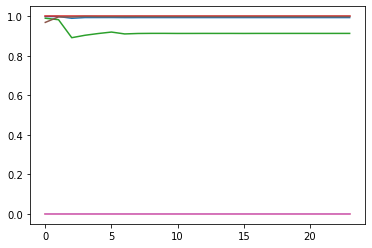

step: 3/4, D_loss: 0.1410683, G_loss_U: 3.0446417, G_loss_S: 0.020463267, E_loss_t0: 16.341074


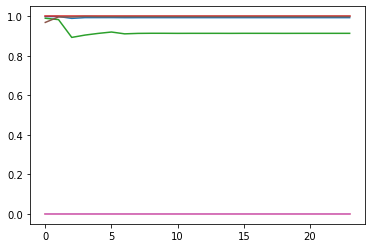

step: 3/4, D_loss: 0.14020954, G_loss_U: 3.0446332, G_loss_S: 0.020268155, E_loss_t0: 16.397833


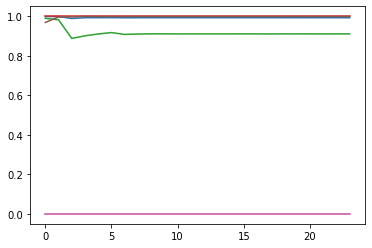

step: 3/4, D_loss: 0.15465134, G_loss_U: 3.1156774, G_loss_S: 0.019995665, E_loss_t0: 16.530403


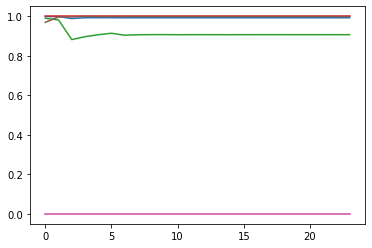

step: 3/4, D_loss: 0.12543295, G_loss_U: 3.115666, G_loss_S: 0.019890746, E_loss_t0: 16.595394


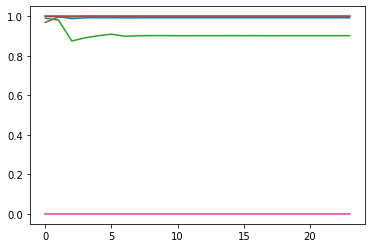

step: 3/4, D_loss: 0.12016674, G_loss_U: 3.115653, G_loss_S: 0.019779198, E_loss_t0: 16.620787


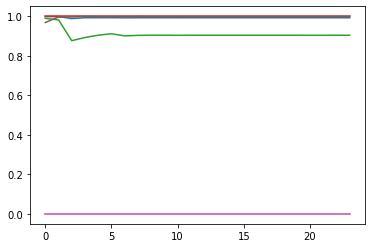

step: 3/4, D_loss: 0.11780127, G_loss_U: 3.1156387, G_loss_S: 0.019634368, E_loss_t0: 16.390245


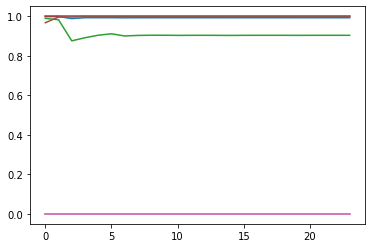

step: 3/4, D_loss: 0.1277766, G_loss_U: 3.115624, G_loss_S: 0.01944231, E_loss_t0: 16.577553


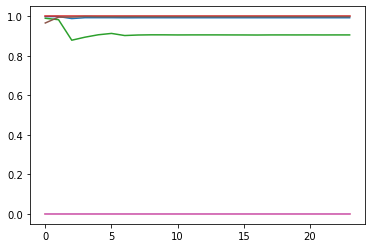

step: 3/4, D_loss: 0.117686294, G_loss_U: 3.1156075, G_loss_S: 0.019325566, E_loss_t0: 16.517271


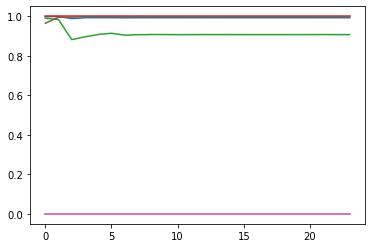

step: 3/4, D_loss: 0.11792739, G_loss_U: 3.1155896, G_loss_S: 0.019076265, E_loss_t0: 16.534012


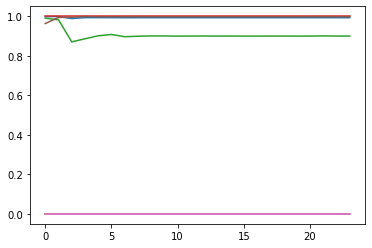

step: 3/4, D_loss: 0.12261515, G_loss_U: 3.1155705, G_loss_S: 0.01898311, E_loss_t0: 16.507502


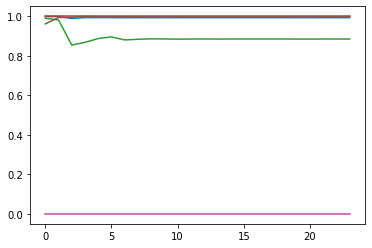

step: 3/4, D_loss: 0.118494816, G_loss_U: 3.1155496, G_loss_S: 0.018663859, E_loss_t0: 16.415775


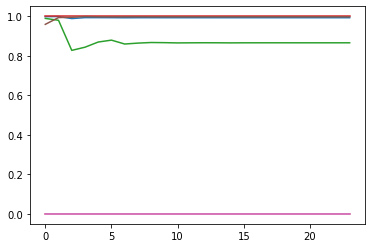

step: 3/4, D_loss: 0.12581502, G_loss_U: 3.1155276, G_loss_S: 0.01866506, E_loss_t0: 16.429138


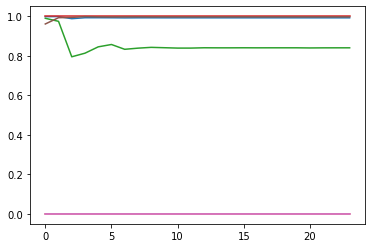

step: 3/4, D_loss: 0.1243582, G_loss_U: 3.1155043, G_loss_S: 0.01819104, E_loss_t0: 16.367237


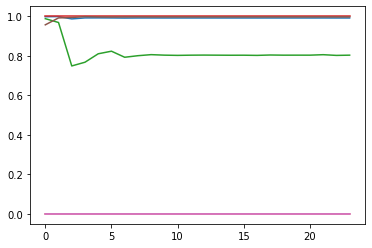

step: 3/4, D_loss: 0.11945018, G_loss_U: 3.1154804, G_loss_S: 0.018211843, E_loss_t0: 16.417768


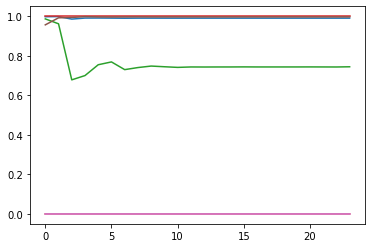

step: 3/4, D_loss: 0.12910478, G_loss_U: 3.1154556, G_loss_S: 0.017942244, E_loss_t0: 16.361477


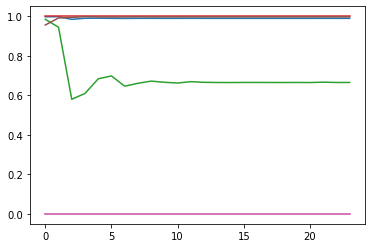

step: 3/4, D_loss: 0.13566056, G_loss_U: 3.115431, G_loss_S: 0.017698713, E_loss_t0: 16.497011


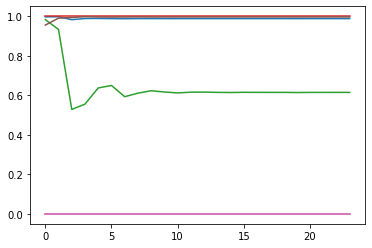

step: 3/4, D_loss: 0.13113654, G_loss_U: 3.115407, G_loss_S: 0.01750606, E_loss_t0: 16.56358


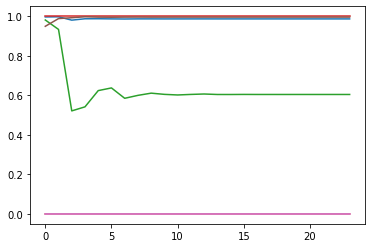

step: 3/4, D_loss: 0.14384916, G_loss_U: 3.1153846, G_loss_S: 0.017337028, E_loss_t0: 16.347502


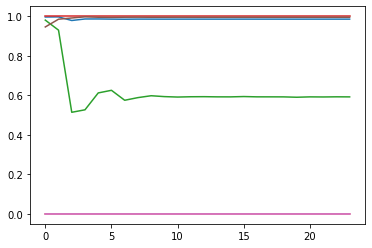

step: 3/4, D_loss: 0.15880707, G_loss_U: 3.1805549, G_loss_S: 0.016996698, E_loss_t0: 16.557125


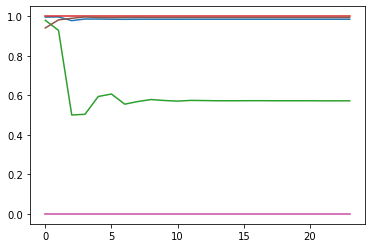

step: 3/4, D_loss: 0.11823569, G_loss_U: 3.1805313, G_loss_S: 0.017045239, E_loss_t0: 16.43875


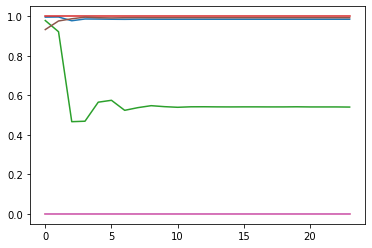

step: 3/4, D_loss: 0.1151529, G_loss_U: 3.1805115, G_loss_S: 0.017167239, E_loss_t0: 16.469807


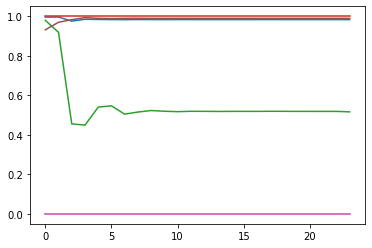

step: 3/4, D_loss: 0.11463305, G_loss_U: 3.1804953, G_loss_S: 0.01718095, E_loss_t0: 16.723457


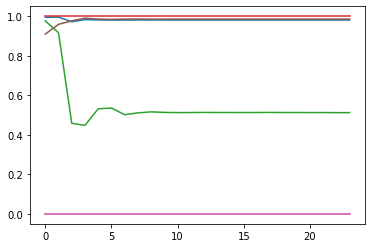

step: 3/4, D_loss: 0.10954155, G_loss_U: 3.1804814, G_loss_S: 0.01724942, E_loss_t0: 16.303082


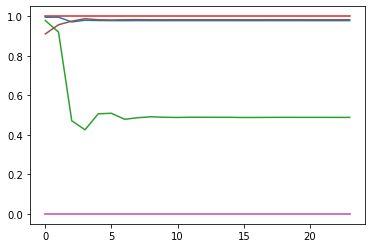

step: 3/4, D_loss: 0.109406725, G_loss_U: 3.1804707, G_loss_S: 0.017231828, E_loss_t0: 16.423124


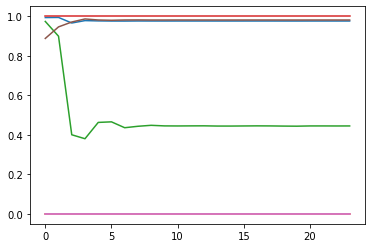

step: 3/4, D_loss: 0.11155761, G_loss_U: 3.180463, G_loss_S: 0.017214239, E_loss_t0: 16.39487


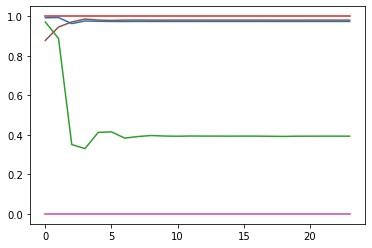

step: 3/4, D_loss: 0.109232515, G_loss_U: 3.1804574, G_loss_S: 0.017205164, E_loss_t0: 16.485626


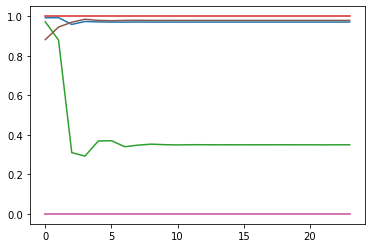

step: 3/4, D_loss: 0.1090263, G_loss_U: 3.1804528, G_loss_S: 0.017079297, E_loss_t0: 16.414366


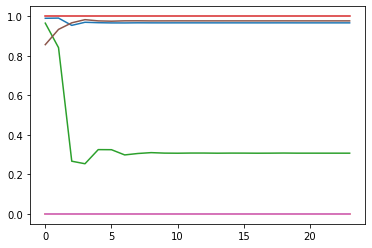

step: 3/4, D_loss: 0.11203464, G_loss_U: 3.1804502, G_loss_S: 0.017030973, E_loss_t0: 16.585012


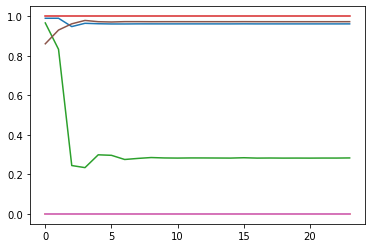

step: 3/4, D_loss: 0.11245607, G_loss_U: 3.1804485, G_loss_S: 0.016857311, E_loss_t0: 16.580256


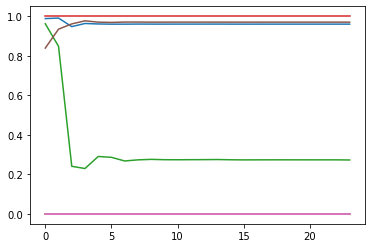

step: 3/4, D_loss: 0.117388524, G_loss_U: 3.180447, G_loss_S: 0.01672228, E_loss_t0: 16.37632


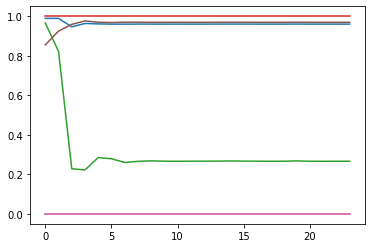

step: 3/4, D_loss: 0.12800822, G_loss_U: 3.1804464, G_loss_S: 0.016506588, E_loss_t0: 16.487892


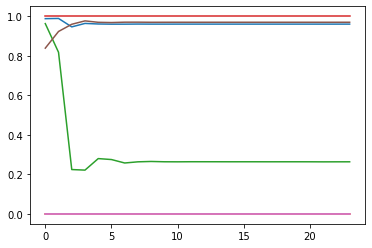

step: 3/4, D_loss: 0.12278683, G_loss_U: 3.1804454, G_loss_S: 0.016454821, E_loss_t0: 16.415665


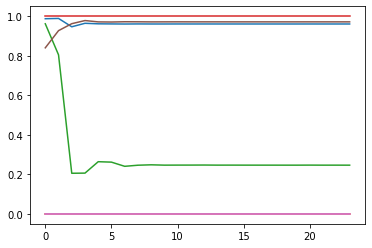

step: 3/4, D_loss: 0.12594227, G_loss_U: 3.1804454, G_loss_S: 0.01614434, E_loss_t0: 16.367615


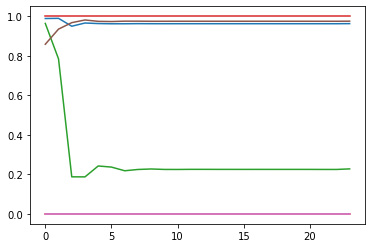

step: 3/4, D_loss: 0.13101298, G_loss_U: 3.1804442, G_loss_S: 0.015988985, E_loss_t0: 16.545376


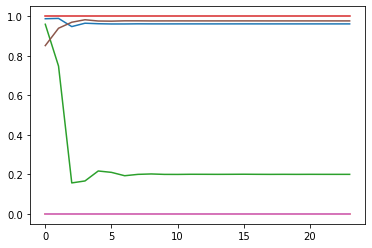

step: 3/4, D_loss: 0.1364687, G_loss_U: 3.1804435, G_loss_S: 0.015746545, E_loss_t0: 16.424858


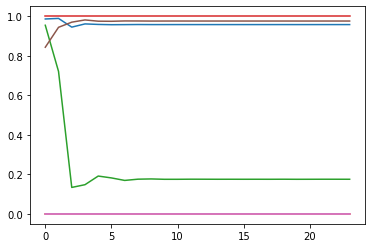

step: 3/4, D_loss: 0.12533654, G_loss_U: 3.1804433, G_loss_S: 0.015440431, E_loss_t0: 16.4282


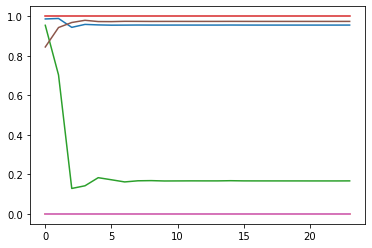

step: 3/4, D_loss: 0.13409248, G_loss_U: 3.1804419, G_loss_S: 0.015264623, E_loss_t0: 16.465172


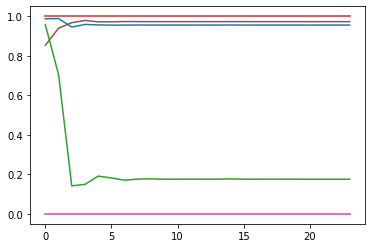

step: 3/4, D_loss: 0.15349993, G_loss_U: 3.2383978, G_loss_S: 0.015089068, E_loss_t0: 16.245842


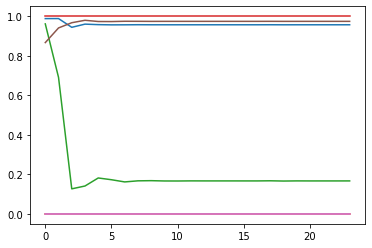

step: 3/4, D_loss: 0.11798376, G_loss_U: 3.2383964, G_loss_S: 0.015120656, E_loss_t0: 16.509277


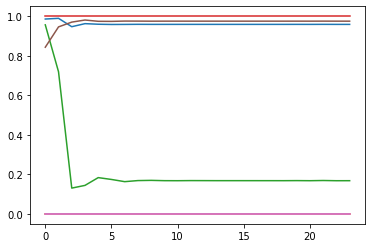

step: 3/4, D_loss: 0.11130565, G_loss_U: 3.2383943, G_loss_S: 0.015160902, E_loss_t0: 16.470823


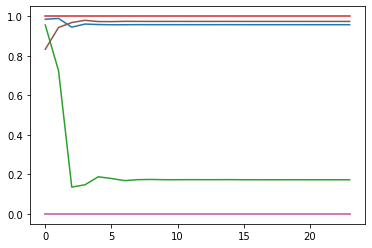

step: 3/4, D_loss: 0.109046414, G_loss_U: 3.2383924, G_loss_S: 0.015209121, E_loss_t0: 16.50676


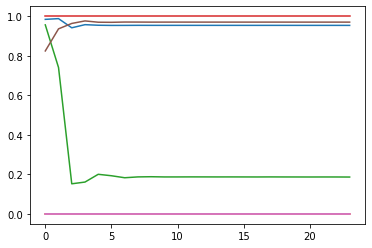

step: 3/4, D_loss: 0.10873296, G_loss_U: 3.2383897, G_loss_S: 0.01531817, E_loss_t0: 16.474154


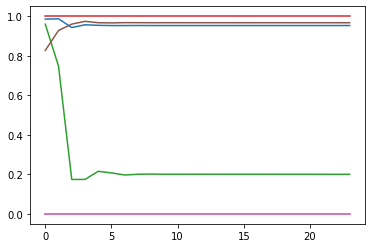

step: 3/4, D_loss: 0.10569327, G_loss_U: 3.2383876, G_loss_S: 0.015348932, E_loss_t0: 16.353495


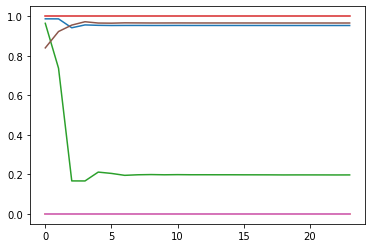

step: 3/4, D_loss: 0.11370872, G_loss_U: 3.2383847, G_loss_S: 0.015386095, E_loss_t0: 16.694885


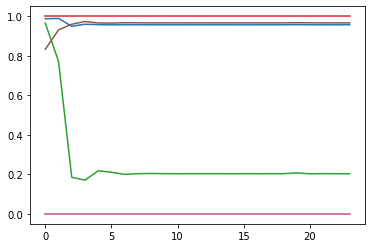

step: 3/4, D_loss: 0.11370679, G_loss_U: 3.238382, G_loss_S: 0.015445769, E_loss_t0: 16.522411


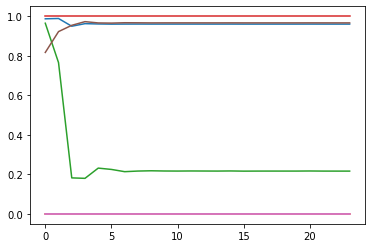

step: 3/4, D_loss: 0.11772762, G_loss_U: 3.238379, G_loss_S: 0.015440869, E_loss_t0: 16.4998


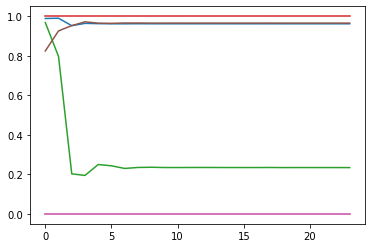

step: 3/4, D_loss: 0.11484682, G_loss_U: 3.2383757, G_loss_S: 0.015405439, E_loss_t0: 16.489027


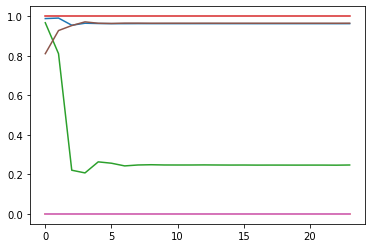

step: 3/4, D_loss: 0.111479044, G_loss_U: 3.238372, G_loss_S: 0.015303596, E_loss_t0: 16.67307


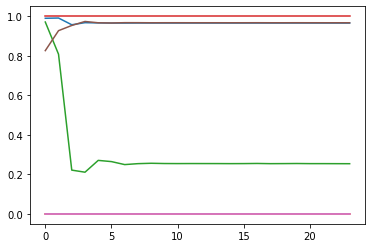

step: 3/4, D_loss: 0.11139751, G_loss_U: 3.2383687, G_loss_S: 0.015358661, E_loss_t0: 16.426155


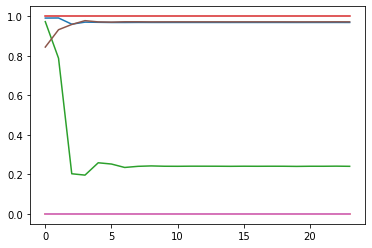

step: 3/4, D_loss: 0.117024176, G_loss_U: 3.238365, G_loss_S: 0.015268584, E_loss_t0: 16.365778


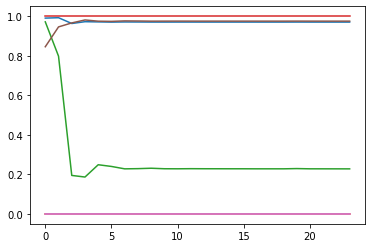

step: 3/4, D_loss: 0.13098235, G_loss_U: 3.2383616, G_loss_S: 0.015162246, E_loss_t0: 16.393381


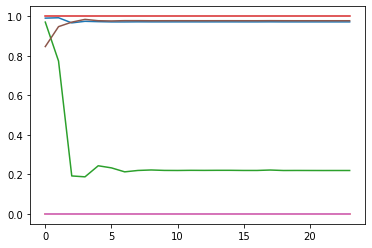

Finish Joint Training


In [ ]:
Generator, Embedder, Supervisor, Recovery, Discriminator, checkpoints = TimeGAN(data, parameters)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.023s...
[t-SNE] Computed neighbors for 2000 samples in 0.337s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.001069
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.139946
[t-SNE] KL divergence after 300 iterations: 1.699220


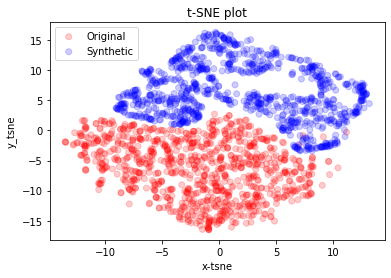

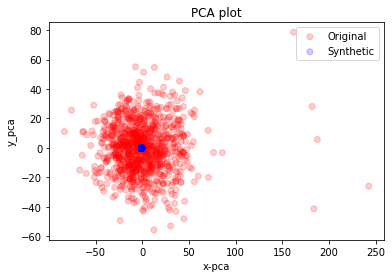

In [ ]:
random_test = random_generator(no, dim, extract_time(data)[0], extract_time(data)[1])
test_sample = Generator(torch.tensor(random_generator(no, dim, extract_time(data)[0], extract_time(data)[1])).float())[0]
test_sample = torch.reshape(test_sample, (no, seq_len, parameters['hidden_dim']))
test_recovery = Recovery(test_sample)
test_recovery = torch.reshape(test_recovery[0], (no, seq_len, dim))
visualization(data, test_recovery.detach().numpy(), 'tsne')
visualization(data, test_recovery.detach().numpy(), 'pca')
  